In [10]:
# ============================================================================
# QUALITY CONTROL CODE FOR PHENOCYCLER DATA PROCESSING
# ============================================================================
# This QC module validates:
# 1. Raw data integrity and structure
# 2. Gate appropriateness (from napari_gates.csv)
# 3. Rescaling operation correctness
# 4. Tissue-specific marker differences
# 5. Phenotype assignment validation

import os
import numpy as np
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Configuration
base_dir = "/home/smith6jt/maxfuse/data"

print("=" * 80)
print("QUALITY CONTROL: PHENOCYCLER DATA PROCESSING")
print("=" * 80)

# ============================================================================
# SECTION 1: LOAD AND VALIDATE RAW DATA
# ============================================================================
print("\n" + "=" * 80)
print("SECTION 1: RAW DATA VALIDATION")
print("=" * 80)

# Load raw data
adata_raw = ad.read_h5ad(os.path.join(base_dir, '6551_qupath_raw_export_v2.h5ad'))
print(f"\n✓ Loaded raw data: {adata_raw.shape[0]:,} cells × {adata_raw.shape[1]} markers")

# Check for NaN/Inf values
nan_count = np.isnan(adata_raw.X).sum()
inf_count = np.isinf(adata_raw.X).sum()
print(f"✓ NaN values: {nan_count}")
print(f"✓ Inf values: {inf_count}")

# Data range check
print(f"✓ Raw data range: [{adata_raw.X.min():.2f}, {adata_raw.X.max():.2f}]")
print(f"✓ Mean intensity: {adata_raw.X.mean():.2f}")

# Check for negative values (shouldn't exist in fluorescence data)
neg_count = (adata_raw.X < 0).sum()
if neg_count > 0:
    print(f"⚠ WARNING: {neg_count} negative values found - check data processing")
else:
    print(f"✓ No negative values (expected for fluorescence)")


QUALITY CONTROL: PHENOCYCLER DATA PROCESSING

SECTION 1: RAW DATA VALIDATION

✓ Loaded raw data: 1,900,753 cells × 59 markers
✓ NaN values: 0
✓ Inf values: 0
✓ Raw data range: [0.00, 64231.57]
✓ Mean intensity: 451.69
✓ No negative values (expected for fluorescence)


In [11]:
# ============================================================================
# SECTION 2: TISSUE ANNOTATION VALIDATION
# ============================================================================
print("\n" + "=" * 80)
print("SECTION 2: TISSUE ANNOTATION VALIDATION")
print("=" * 80)

# Check available annotations
print("\nAvailable obs columns:", list(adata_raw.obs.columns)[:15], "...")

# Check Parent annotation which determines tissue type
if 'Parent' in adata_raw.obs.columns:
    print("\nParent annotation values:")
    print(adata_raw.obs['Parent'].value_counts())
    
# Assign tissue based on Parent annotation
def assign_tissue_by_parent(parent):
    if pd.isna(parent):
        return 'Unknown'
    elif 'Tissue_LN' in str(parent):
        return 'pLN'
    elif 'Tissue' in str(parent) or 'Islet' in str(parent):
        return 'Pancreas'
    else:
        return 'Unknown'

adata_raw.obs['Tissue'] = adata_raw.obs['Parent'].apply(assign_tissue_by_parent)

print("\n✓ Tissue assignment:")
tissue_counts = adata_raw.obs['Tissue'].value_counts()
for tissue, count in tissue_counts.items():
    pct = count / len(adata_raw) * 100
    print(f"   {tissue}: {count:,} cells ({pct:.1f}%)")

# Filter to valid tissues
adata_valid = adata_raw[(adata_raw.obs['Tissue'] == 'Pancreas') | (adata_raw.obs['Tissue'] == 'pLN')].copy()
print(f"\n✓ After filtering: {adata_valid.shape[0]:,} cells")



SECTION 2: TISSUE ANNOTATION VALIDATION

Available obs columns: ['imageid', 'Object ID', 'Classification', 'Parent', 'X_centroid', 'Y_centroid', 'Cell_Area', 'Cell_Length', 'Cell_Circularity', 'Cell_Solidity', 'Cell_Max_diameter', 'Cell_Min_diameter', 'SignedDistanceIslet', 'SignedDistanceIsletExpanded', 'SignedDistanceTissue_LN'] ...

Parent annotation values:
Parent
Annotation (Tissue)       1704289
Root object (Image)         87484
Annotation (Tissue_LN)      56216
Islet_44                     2225
Islet_145                     851
                           ...   
Islet_301                       4
Islet_257                       4
Islet_280                       4
Islet_134                       2
Islet_8                         2
Name: count, Length: 735, dtype: int64

✓ Tissue assignment:
   Pancreas: 1,757,053 cells (92.4%)
   Unknown: 87,484 cells (4.6%)
   pLN: 56,216 cells (3.0%)

✓ After filtering: 1,813,269 cells


In [12]:
# ============================================================================
# QUALITY CONTROL: PHENOCYCLER DATA PROCESSING
# ============================================================================

import os
import numpy as np
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")



# ============================================================================
# SECTION 1: RAW DATA VALIDATION
# ============================================================================
print("=" * 80)
print("QC SECTION 1: RAW DATA VALIDATION")
print("=" * 80)

adata_raw = ad.read_h5ad(os.path.join(base_dir, '6551_qupath_raw_export_v2.h5ad'))
print(f"\n✓ Loaded: {adata_raw.shape[0]:,} cells × {adata_raw.shape[1]} markers")

# Check for NaN/Inf values
nan_count = np.isnan(adata_raw.X).sum()
inf_count = np.isinf(adata_raw.X).sum()
print(f"✓ NaN values: {nan_count}")
print(f"✓ Inf values: {inf_count}")

# Data range
print(f"✓ Raw data range: [{adata_raw.X.min():.2f}, {adata_raw.X.max():.2f}]")
print(f"✓ Mean intensity: {adata_raw.X.mean():.2f}")

# Negative values check
neg_count = (adata_raw.X < 0).sum()
print(f"✓ Negative values: {neg_count}" + (" ⚠ CHECK!" if neg_count > 0 else ""))

print(f"\n✓ Markers ({len(adata_raw.var_names)}): {list(adata_raw.var_names)[:8]}...")
print(f"✓ Obs columns: {list(adata_raw.obs.columns)[:8]}...")


QC SECTION 1: RAW DATA VALIDATION

✓ Loaded: 1,900,753 cells × 59 markers
✓ NaN values: 0
✓ Inf values: 0
✓ Raw data range: [0.00, 64231.57]
✓ Mean intensity: 451.69
✓ Negative values: 0

✓ Markers (59): ['DAPI', 'IAPP', 'CD107a', 'CD4', 'CD31', 'SMA', 'CD68', 'CD44']...
✓ Obs columns: ['imageid', 'Object ID', 'Classification', 'Parent', 'X_centroid', 'Y_centroid', 'Cell_Area', 'Cell_Length']...


In [13]:
# ============================================================================
# SECTION 2: TISSUE ANNOTATION VALIDATION
# ============================================================================
print("\n" + "=" * 80)
print("QC SECTION 2: TISSUE ANNOTATION VALIDATION")
print("=" * 80)

# Check Parent annotation
print("\nParent annotation values:")
print(adata_raw.obs['Parent'].value_counts())

# Assign tissue based on Parent annotation
def assign_tissue_by_parent(parent):
    if pd.isna(parent):
        return 'Unknown'
    elif 'Tissue_LN' in str(parent):
        return 'pLN'
    elif 'Tissue' in str(parent) or 'Islet' in str(parent):
        return 'Pancreas'
    else:
        return 'Unknown'

adata_raw.obs['Tissue'] = adata_raw.obs['Parent'].apply(assign_tissue_by_parent)

print("\n✓ Tissue assignment:")
tissue_counts = adata_raw.obs['Tissue'].value_counts()
for tissue, count in tissue_counts.items():
    pct = count / len(adata_raw) * 100
    print(f"   {tissue}: {count:,} cells ({pct:.1f}%)")

# Filter to valid tissues for subsequent analysis
adata_filtered = adata_raw[(adata_raw.obs['Tissue'] == 'Pancreas') | (adata_raw.obs['Tissue'] == 'pLN')].copy()
print(f"\n✓ After filtering to Pancreas/pLN: {adata_filtered.shape[0]:,} cells")



QC SECTION 2: TISSUE ANNOTATION VALIDATION

Parent annotation values:
Parent
Annotation (Tissue)       1704289
Root object (Image)         87484
Annotation (Tissue_LN)      56216
Islet_44                     2225
Islet_145                     851
                           ...   
Islet_301                       4
Islet_257                       4
Islet_280                       4
Islet_134                       2
Islet_8                         2
Name: count, Length: 735, dtype: int64

✓ Tissue assignment:
   Pancreas: 1,757,053 cells (92.4%)
   Unknown: 87,484 cells (4.6%)
   pLN: 56,216 cells (3.0%)

✓ After filtering to Pancreas/pLN: 1,813,269 cells


In [14]:
# ============================================================================
# SECTION 3: GATE VALIDATION
# ============================================================================
print("\n" + "=" * 80)
print("QC SECTION 3: GATE VALIDATION")
print("=" * 80)

gates_df = pd.read_csv(os.path.join(base_dir, 'napari_gates.csv'))
gates = dict(zip(gates_df['markers'], gates_df['gates']))

# Key markers for T cell phenotyping (manuscript focus)
key_markers = ['CD3e', 'CD4', 'CD8', 'FOXP3', 'TCF-1', 'TOX', 'PD-1', 
               'Granzyme B', 'CD57', 'CD39', 'ICOS', 'Bcl-2', 'Ki67',
               'CD20', 'CD68', 'CD44', 'HLA-DR', 'CD107a']

key_markers = [m for m in key_markers if m in adata_filtered.var_names and m in gates]

# Calculate log-transformed values (what scimap rescale uses internally)
log_data = np.log1p(adata_filtered.X)

print("\nGate Analysis (gates are on LOG scale for scimap rescale):")
print("-" * 90)
print(f"{'Marker':15s} {'Gate':>8s} {'%Pos':>8s} {'P90':>8s} {'P95':>8s} {'P99':>8s} {'Status':>12s}")
print("-" * 90)

gate_results = []
for marker in key_markers:
    idx = list(adata_filtered.var_names).index(marker)
    values = log_data[:, idx]
    gate = gates[marker]
    
    pct_pos = (values > gate).mean() * 100
    p90 = np.percentile(values, 90)
    p95 = np.percentile(values, 95)
    p99 = np.percentile(values, 99)
    
    # Status check
    if pct_pos < 0.5:
        status = "⚠ TOO HIGH"
    elif pct_pos > 70:
        status = "⚠ TOO LOW"
    elif pct_pos < 2:
        status = "⚡ HIGH"
    elif pct_pos > 50:
        status = "⚡ LOW"
    else:
        status = "✓ OK"
    
    print(f"{marker:15s} {gate:>8.2f} {pct_pos:>7.1f}% {p90:>8.2f} {p95:>8.2f} {p99:>8.2f} {status:>12s}")
    gate_results.append({
        'marker': marker, 'gate': gate, 'pct_pos': pct_pos,
        'p90': p90, 'p95': p95, 'p99': p99, 'status': status
    })

print("-" * 90)
print("\nLegend: ✓ OK = 2-50% positive, ⚡ = borderline, ⚠ = check gate")



QC SECTION 3: GATE VALIDATION

Gate Analysis (gates are on LOG scale for scimap rescale):
------------------------------------------------------------------------------------------
Marker              Gate     %Pos      P90      P95      P99       Status
------------------------------------------------------------------------------------------
CD3e                6.00    12.0%     6.03     6.18     8.13         ✓ OK
CD4                 6.70     8.8%     6.67     6.82     7.59         ✓ OK
CD8                 5.30     6.3%     5.21     5.35     7.60         ✓ OK
FOXP3               6.50     9.4%     6.49     6.58     6.74         ✓ OK
TCF-1               6.90    10.6%     6.92     7.09     7.35         ✓ OK
TOX                 6.10     6.1%     6.04     6.12     6.32         ✓ OK
PD-1                5.90     8.8%     5.88     5.98     6.21         ✓ OK
Granzyme B          6.80     6.9%     6.76     6.83     6.97         ✓ OK
CD57                5.10     0.1%     2.30     2.50     2.93 

In [15]:
# ============================================================================
# SECTION 4: TISSUE-SPECIFIC MARKER ANALYSIS
# ============================================================================
print("\n" + "=" * 80)
print("QC SECTION 4: TISSUE-SPECIFIC MARKER DIFFERENCES")
print("=" * 80)

# Markers expected to differ between Pancreas and pLN
tissue_markers = ['CD3e', 'CD4', 'CD8', 'FOXP3', 'TCF-1', 'TOX', 'PD-1', 
                  'CD20', 'ICOS', 'HLA-DR', 'INS', 'GCG', 'SST', 'CD68',
                  'Granzyme B', 'CD44', 'Bcl-2', 'CD39']
tissue_markers = [m for m in tissue_markers if m in adata_filtered.var_names]

print("\nMean log1p expression by tissue:")
print("-" * 75)
print(f"{'Marker':15s} {'Pancreas':>12s} {'pLN':>12s} {'Ratio':>10s} {'Note':>20s}")
print("-" * 75)

tissue_results = []
for marker in tissue_markers:
    idx = list(adata_filtered.var_names).index(marker)
    
    panc_mask = adata_filtered.obs['Tissue'] == 'Pancreas'
    pln_mask = adata_filtered.obs['Tissue'] == 'pLN'
    
    panc_mean = np.log1p(adata_filtered.X[panc_mask, idx]).mean()
    pln_mean = np.log1p(adata_filtered.X[pln_mask, idx]).mean()
    
    ratio = pln_mean / panc_mean if panc_mean > 0 else np.nan
    
    note = ""
    if ratio > 2:
        note = "⚠ pLN-enriched"
    elif ratio < 0.5:
        note = "⚠ Pancreas-enriched"
    
    print(f"{marker:15s} {panc_mean:>12.2f} {pln_mean:>12.2f} {ratio:>10.2f} {note:>20s}")
    tissue_results.append({
        'marker': marker, 'pancreas': panc_mean, 'pLN': pln_mean, 'ratio': ratio
    })

print("-" * 75)
print("\n⚠ Markers with >2x difference may need tissue-specific gates")



QC SECTION 4: TISSUE-SPECIFIC MARKER DIFFERENCES

Mean log1p expression by tissue:
---------------------------------------------------------------------------
Marker              Pancreas          pLN      Ratio                 Note
---------------------------------------------------------------------------
CD3e                    5.66         6.71       1.19                     
CD4                     6.29         6.91       1.10                     
CD8                     4.58         5.26       1.15                     
FOXP3                   6.08         5.93       0.97                     
TCF-1                   6.22         6.12       0.98                     
TOX                     5.67         5.53       0.98                     
PD-1                    5.49         5.38       0.98                     
CD20                    4.78         5.18       1.08                     
ICOS                    6.21         6.26       1.01                     
HLA-DR                  

In [16]:
# Quick tissue comparison - just key T cell markers
tissue_markers = ['CD3e', 'CD4', 'CD8', 'TCF-1', 'TOX', 'PD-1', 'CD20', 'INS']
tissue_markers = [m for m in tissue_markers if m in adata_filtered.var_names]

print("Mean log1p expression by tissue (key markers):")
print("-" * 60)
for marker in tissue_markers:
    idx = list(adata_filtered.var_names).index(marker)
    panc_vals = np.log1p(adata_filtered.X[adata_filtered.obs['Tissue'] == 'Pancreas', idx])
    pln_vals = np.log1p(adata_filtered.X[adata_filtered.obs['Tissue'] == 'pLN', idx])
    ratio = pln_vals.mean() / panc_vals.mean() if panc_vals.mean() > 0 else 0
    note = "⚠ pLN-high" if ratio > 1.5 else ("⚠ Panc-high" if ratio < 0.67 else "")
    print(f"{marker:12s} Panc={panc_vals.mean():.2f}  pLN={pln_vals.mean():.2f}  ratio={ratio:.2f} {note}")


Mean log1p expression by tissue (key markers):
------------------------------------------------------------
CD3e         Panc=5.66  pLN=6.71  ratio=1.19 
CD4          Panc=6.29  pLN=6.91  ratio=1.10 
CD8          Panc=4.58  pLN=5.26  ratio=1.15 
TCF-1        Panc=6.22  pLN=6.12  ratio=0.98 
TOX          Panc=5.67  pLN=5.53  ratio=0.98 
PD-1         Panc=5.49  pLN=5.38  ratio=0.98 
CD20         Panc=4.78  pLN=5.18  ratio=1.08 
INS          Panc=2.71  pLN=2.24  ratio=0.83 


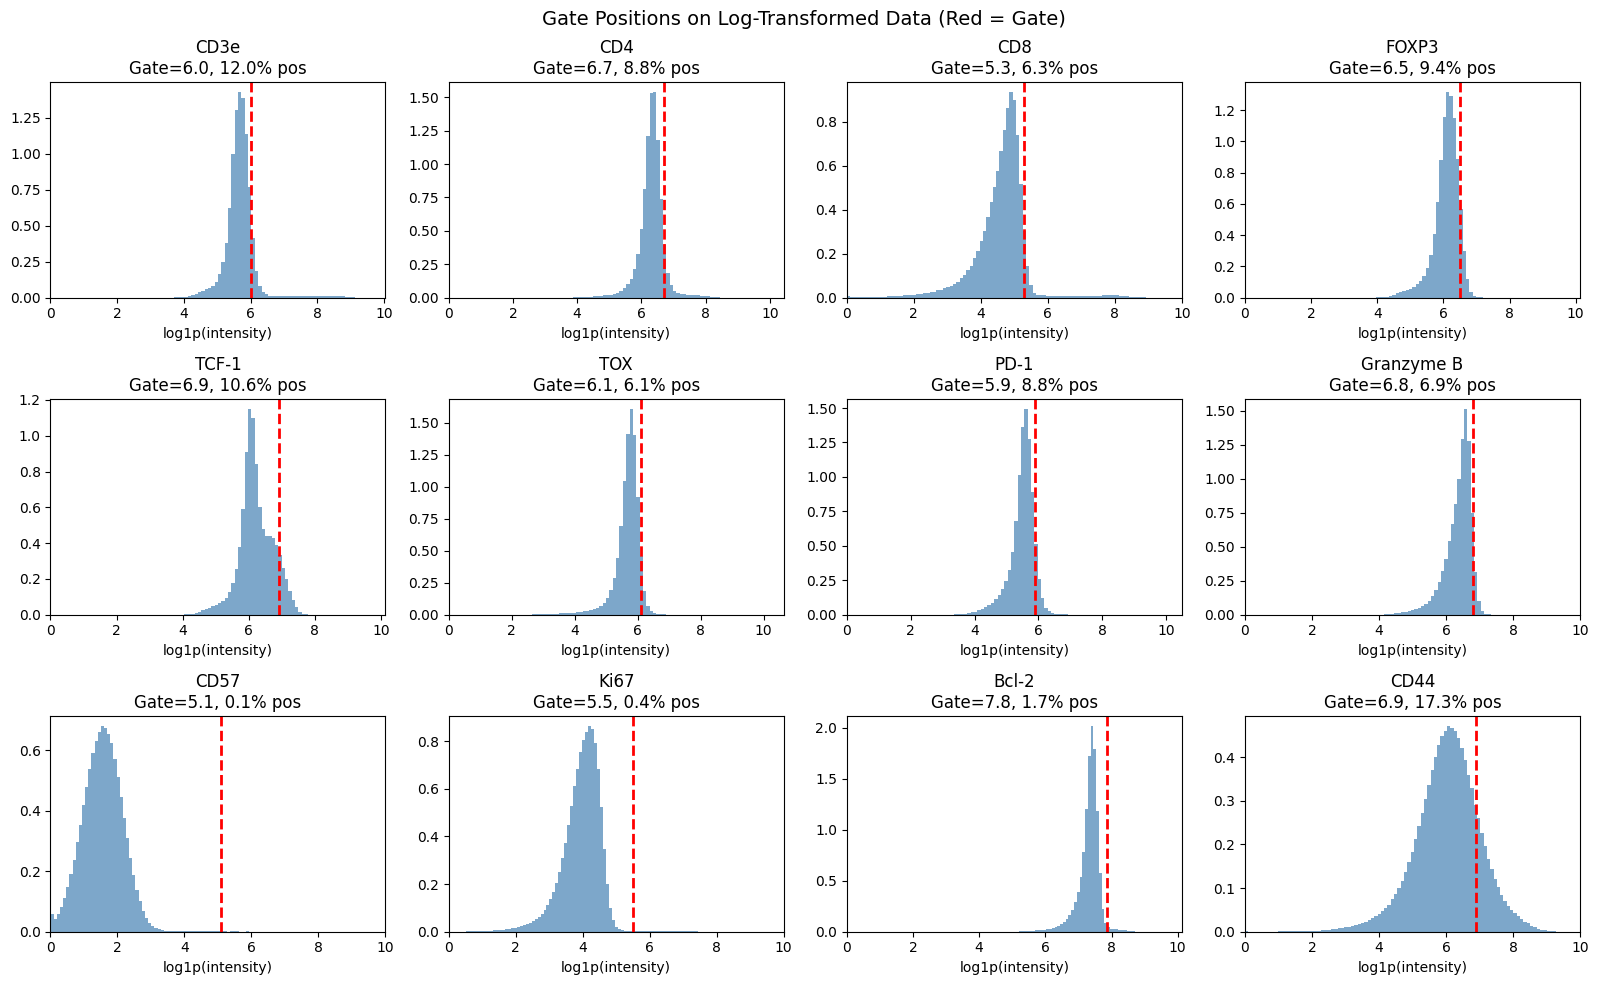

In [17]:
# ============================================================================
# SECTION 5: GATE VISUALIZATION FOR KEY T CELL MARKERS
# ============================================================================
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.flatten()

markers_to_plot = ['CD3e', 'CD4', 'CD8', 'FOXP3', 'TCF-1', 'TOX', 
                   'PD-1', 'Granzyme B', 'CD57', 'Ki67', 'Bcl-2', 'CD44']
markers_to_plot = [m for m in markers_to_plot if m in adata_filtered.var_names]

for idx, marker in enumerate(markers_to_plot):
    ax = axes[idx]
    marker_idx = list(adata_filtered.var_names).index(marker)
    values = np.log1p(adata_filtered.X[:, marker_idx])
    gate = gates.get(marker, None)
    
    ax.hist(values, bins=100, alpha=0.7, color='steelblue', edgecolor='none', density=True)
    if gate:
        ax.axvline(x=gate, color='red', linestyle='--', linewidth=2)
        pct_pos = (values > gate).mean() * 100
        ax.set_title(f'{marker}\nGate={gate:.1f}, {pct_pos:.1f}% pos')
    else:
        ax.set_title(marker)
    ax.set_xlabel('log1p(intensity)')
    ax.set_xlim(0, max(values.max(), 10))

for idx in range(len(markers_to_plot), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Gate Positions on Log-Transformed Data (Red = Gate)', fontsize=14)
plt.tight_layout()
plt.show()


In [18]:
# ============================================================================
# SECTION 6: CHECK PROCESSED DATA (if available)
# ============================================================================
print("=" * 80)
print("QC SECTION 6: PROCESSED DATA VALIDATION")
print("=" * 80)

# Try to load the processed data
try:
    adata_processed = ad.read_h5ad(os.path.join(base_dir, '6551_gated_umap_v3.h5ad'))
    print(f"\n✓ Loaded processed data: {adata_processed.shape[0]:,} cells")
    
    # Check data range (should be 0-1 after rescale)
    print(f"\n--- Data Range Check ---")
    print(f"X range: [{adata_processed.X.min():.3f}, {adata_processed.X.max():.3f}]")
    
    if adata_processed.X.max() > 1.5:
        print("⚠ WARNING: Data appears to be double-transformed!")
        print("   Expected: [0, 1] after rescale")
        print("   Found: values > 1.5 suggest log1p was applied AFTER rescale")
    elif adata_processed.X.max() <= 1.01 and adata_processed.X.min() >= -0.01:
        print("✓ Data correctly scaled to [0, 1]")
    
    # Check phenotype column
    if 'phenotype' in adata_processed.obs.columns:
        print(f"\n--- Phenotype Distribution (top 15) ---")
        pheno_counts = adata_processed.obs['phenotype'].value_counts()
        total = len(adata_processed)
        for pheno, count in pheno_counts.head(15).items():
            pct = count / total * 100
            print(f"  {pheno:30s}: {count:>8,} ({pct:>5.1f}%)")
        
        # Check T cell phenotypes specifically
        print(f"\n--- T Cell Phenotypes ---")
        t_phenos = ['T_cell', 'CD4_T_helper', 'CD8_T_cytotoxic', 'Treg', 'DN_T_cell',
                    'Effector_CD8', 'Memory_CD8', 'Exhausted_CD8', 'Progenitor_exhausted',
                    'Terminally_exhausted', 'Senescent_CD8']
        for pheno in t_phenos:
            if pheno in pheno_counts.index:
                count = pheno_counts[pheno]
                pct = count / total * 100
                print(f"  {pheno:30s}: {count:>8,} ({pct:>5.1f}%)")
    
except Exception as e:
    print(f"Could not load processed data: {e}")


QC SECTION 6: PROCESSED DATA VALIDATION

✓ Loaded processed data: 1,813,269 cells

--- Data Range Check ---
X range: [0.000, 1.000]
✓ Data correctly scaled to [0, 1]

--- Phenotype Distribution (top 15) ---
  Epithelial                    :  894,552 ( 49.3%)
  Monocyte                      :  215,884 ( 11.9%)
  DN_T_cell                     :  114,072 (  6.3%)
  Macrophage                    :  102,087 (  5.6%)
  Blood_vessel                  :   78,051 (  4.3%)
  Ductal_Epithelial             :   71,421 (  3.9%)
  Fibroblast                    :   68,193 (  3.8%)
  Endothelial                   :   50,896 (  2.8%)
  Nerve_fiber                   :   41,663 (  2.3%)
  Myeloid                       :   41,342 (  2.3%)
  Immune                        :   25,031 (  1.4%)
  Basement_membrane             :   20,568 (  1.1%)
  Alpha_cell                    :   18,321 (  1.0%)
  Unknown                       :   11,681 (  0.6%)
  Memory_CD8                    :    8,622 (  0.5%)

--- T Cell P

In [19]:
# ============================================================================
# SECTION 7: DIAGNOSE DN_T_CELL ISSUE
# ============================================================================
print("=" * 80)
print("QC SECTION 7: DIAGNOSING T CELL PHENOTYPING ISSUE")
print("=" * 80)

# The problem: 114,072 DN_T_cells but only 92 CD4 and 89 CD8 T helpers
# This suggests most CD3e+ cells are failing CD4/CD8 classification

# Check marker expression on "DN_T_cell" phenotype
dn_mask = adata_processed.obs['phenotype'] == 'DN_T_cell'

print(f"\n--- Marker Expression on DN_T_cell (n={dn_mask.sum():,}) ---")
print("These cells should be CD3e+ but CD4- and CD8-")
print("Values are 0-1 scaled, with 0.5 = gate threshold\n")

markers_to_check = ['CD3e', 'CD4', 'CD8', 'TCF-1', 'TOX', 'PD-1', 'FOXP3']
markers_to_check = [m for m in markers_to_check if m in adata_processed.var_names]

print(f"{'Marker':12s} {'Mean':>8s} {'Median':>8s} {'>0.5':>8s} {'Expected':>15s}")
print("-" * 55)

for marker in markers_to_check:
    vals = adata_processed[dn_mask, marker].X.flatten()
    mean_val = vals.mean()
    median_val = np.median(vals)
    pct_pos = (vals > 0.5).mean() * 100
    
    # Expected for DN T cells
    if marker == 'CD3e':
        expected = "HIGH (>50%)"
    elif marker in ['CD4', 'CD8']:
        expected = "LOW (<50%)"
    else:
        expected = "-"
    
    print(f"{marker:12s} {mean_val:>8.3f} {median_val:>8.3f} {pct_pos:>7.1f}% {expected:>15s}")

# Also check what % of CD3e+ cells end up as DN
print(f"\n--- CD3e+ Cell Classification ---")
cd3_pos_mask = adata_processed[:, 'CD3e'].X.flatten() > 0.5
total_cd3_pos = cd3_pos_mask.sum()
print(f"Total CD3e+ cells: {total_cd3_pos:,}")

# Of CD3e+ cells, how many are each T cell type?
t_phenotypes = ['DN_T_cell', 'CD4_T_helper', 'CD8_T_cytotoxic', 'Treg', 'T_cell',
                'Effector_CD8', 'Memory_CD8', 'Exhausted_CD8']
print("\nOf CD3e+ cells, phenotype breakdown:")
for pheno in t_phenotypes:
    mask = (adata_processed.obs['phenotype'] == pheno) & cd3_pos_mask
    count = mask.sum()
    pct = count / total_cd3_pos * 100 if total_cd3_pos > 0 else 0
    print(f"  {pheno:25s}: {count:>7,} ({pct:>5.1f}%)")


QC SECTION 7: DIAGNOSING T CELL PHENOTYPING ISSUE

--- Marker Expression on DN_T_cell (n=114,072) ---
These cells should be CD3e+ but CD4- and CD8-
Values are 0-1 scaled, with 0.5 = gate threshold

Marker           Mean   Median     >0.5        Expected
-------------------------------------------------------
CD3e            0.445    0.442     4.4%     HIGH (>50%)
CD4             0.449    0.452     0.0%      LOW (<50%)
CD8             0.333    0.337     0.0%      LOW (<50%)
TCF-1           0.541    0.547    73.2%               -
TOX             0.429    0.435     0.0%               -
PD-1            0.436    0.440     0.1%               -
FOXP3           0.436    0.440     0.0%               -

--- CD3e+ Cell Classification ---
Total CD3e+ cells: 49,393

Of CD3e+ cells, phenotype breakdown:
  DN_T_cell                :   5,014 ( 10.2%)
  CD4_T_helper             :      89 (  0.2%)
  CD8_T_cytotoxic          :      89 (  0.2%)
  Treg                     :       0 (  0.0%)
  T_cell       

In [20]:
# ============================================================================
# SECTION 8: WHERE ARE CD3e+ CELLS GOING?
# ============================================================================
print("=" * 80)
print("QC SECTION 8: CD3e+ CELL FATE ANALYSIS")  
print("=" * 80)

cd3_pos_mask = adata_processed[:, 'CD3e'].X.flatten() > 0.5
total_cd3_pos = cd3_pos_mask.sum()

print(f"\nTotal CD3e+ cells (>0.5 scaled): {total_cd3_pos:,}")
print("\nPhenotype distribution of CD3e+ cells:")
print("-" * 55)

cd3_phenos = adata_processed.obs.loc[cd3_pos_mask, 'phenotype'].value_counts()
for pheno, count in cd3_phenos.head(20).items():
    pct = count / total_cd3_pos * 100
    is_tcell = 'T_cell' in pheno or pheno in ['Treg', 'Tfh']
    marker = "✓ T cell" if is_tcell else "⚠ NOT T cell"
    print(f"  {pheno:30s}: {count:>7,} ({pct:>5.1f}%) {marker}")

# Calculate total T cell capture rate
t_cell_phenotypes = ['T_cell', 'DN_T_cell', 'CD4_T_helper', 'CD8_T_cytotoxic', 
                     'Treg', 'Tfh', 'Activated_CD4', 'Memory_CD4', 'CD4_exhausted',
                     'Effector_CD8', 'CD8_CTL', 'Memory_CD8', 'Exhausted_CD8',
                     'Progenitor_exhausted', 'Terminally_exhausted', 'Senescent_CD8',
                     'Activated_Treg', 'Exhausted_Treg']

t_cell_captured = sum([cd3_phenos.get(p, 0) for p in t_cell_phenotypes])
capture_rate = t_cell_captured / total_cd3_pos * 100

print(f"\n{'='*55}")
print(f"T cell phenotype capture rate: {t_cell_captured:,}/{total_cd3_pos:,} = {capture_rate:.1f}%")
print(f"⚠ {100-capture_rate:.1f}% of CD3e+ cells NOT classified as T cells!")


QC SECTION 8: CD3e+ CELL FATE ANALYSIS

Total CD3e+ cells (>0.5 scaled): 49,393

Phenotype distribution of CD3e+ cells:
-------------------------------------------------------
  Immune                        :  24,204 ( 49.0%) ⚠ NOT T cell
  Memory_CD8                    :   8,590 ( 17.4%) ⚠ NOT T cell
  Memory_CD4                    :   6,603 ( 13.4%) ⚠ NOT T cell
  DN_T_cell                     :   5,014 ( 10.2%) ✓ T cell
  T_cell                        :   1,797 (  3.6%) ✓ T cell
  Unknown                       :   1,564 (  3.2%) ⚠ NOT T cell
  Exhausted_CD8                 :     699 (  1.4%) ⚠ NOT T cell
  Senescent_CD8                 :     543 (  1.1%) ⚠ NOT T cell
  Effector_CD8                  :     197 (  0.4%) ⚠ NOT T cell
  CD4_T_helper                  :      89 (  0.2%) ⚠ NOT T cell
  CD8_T_cytotoxic               :      89 (  0.2%) ⚠ NOT T cell
  Blood_vessel                  :       3 (  0.0%) ⚠ NOT T cell
  Macrophage                    :       1 (  0.0%) ⚠ NOT T cell


In [22]:
# ============================================================================
# SECTION 9: PHENOTYPE RULE HIERARCHY ISSUE
# ============================================================================
print("=" * 80)
print("QC SECTION 9: PHENOTYPE HIERARCHY ANALYSIS")
print("=" * 80)

# The issue: Many CD3e+ cells stay at "Immune" or go directly to Memory_CD8/CD4
# without passing through T_cell -> CD8_T_cytotoxic -> Memory_CD8

# Check the phenotype rules to understand the hierarchy
rules = pd.read_csv(os.path.join(base_dir, 'phenotype_rules_manuscript.csv'))

print("\n--- Phenotype Rule Hierarchy ---")
print("CellType -> Phenotype")
print("-" * 40)
for ct in ['all', 'Immune', 'T_cell', 'CD4_T_helper', 'CD8_T_cytotoxic']:
    subset = rules[rules['CellType'] == ct]
    print(f"\n{ct}:")
    for _, row in subset.iterrows():
        markers_used = row.iloc[2:].dropna()
        print(f"  -> {row['Phenotype']:25s} ({len(markers_used)} markers)")

# The problem: Memory_CD8 requires CellType=CD8_T_cytotoxic
# But CD8_T_cytotoxic only has 89 cells!
print("\n" + "=" * 60)
print("⚠ ROOT CAUSE IDENTIFIED:")
print("=" * 60)
print("""
1. CD8_T_cytotoxic rule requires: CD3e+, CD4-, CD8+
   But only 89 cells match this strict criteria.

2. Memory_CD8 rule (child of CD8_T_cytotoxic) can only apply 
   to cells already classified as CD8_T_cytotoxic.

3. However, 8,590 cells are labeled Memory_CD8 despite only 
   89 CD8_T_cytotoxic parents existing.

This suggests scimap is NOT enforcing the hierarchical rules 
correctly, OR Memory_CD8 is matching cells from other paths.
""")


QC SECTION 9: PHENOTYPE HIERARCHY ANALYSIS

--- Phenotype Rule Hierarchy ---
CellType -> Phenotype
----------------------------------------

all:
  -> Acinar                    (10 markers)
  -> Ductal                    (10 markers)
  -> Endocrine                 (5 markers)
  -> Stromal                   (7 markers)
  -> Endothelial               (3 markers)
  -> Immune                    (8 markers)

Immune:
  -> T_cell                    (3 markers)
  -> B_cell                    (3 markers)
  -> Myeloid                   (3 markers)
  -> NK_cell                   (4 markers)

T_cell:
  -> CD4_T                     (4 markers)
  -> CD8_T                     (3 markers)
  -> Treg                      (4 markers)
  -> DN_T                      (4 markers)

CD4_T_helper:

CD8_T_cytotoxic:

⚠ ROOT CAUSE IDENTIFIED:

1. CD8_T_cytotoxic rule requires: CD3e+, CD4-, CD8+
   But only 89 cells match this strict criteria.

2. Memory_CD8 rule (child of CD8_T_cytotoxic) can only apply 
   to ce

In [13]:
# ============================================================================
# SECTION 10: DETAILED RULE ANALYSIS
# ============================================================================
print("=" * 80)
print("QC SECTION 10: T CELL RULE DETAILS")
print("=" * 80)

rules = pd.read_csv(os.path.join(base_dir, 'phenotype_rules.csv'))

# Check the actual marker requirements for T cell phenotypes
t_phenotypes = ['T_cell', 'CD4_T_helper', 'CD8_T_cytotoxic', 'Treg', 'DN_T_cell', 'Memory_CD8']

print("\nDetailed marker requirements:")
print("-" * 70)

for pheno in t_phenotypes:
    row = rules[rules['Phenotype'] == pheno]
    if len(row) == 0:
        continue
    row = row.iloc[0]
    
    print(f"\n{pheno} (parent: {row['CellType']}):")
    markers = row.iloc[2:].dropna()
    for marker, value in markers.items():
        print(f"  {marker:15s}: {value}")

# Now check actual marker values on CD3e+ cells for key markers
print("\n" + "=" * 70)
print("Actual marker values on CD3e+ cells:")
print("=" * 70)

cd3_pos = adata_processed[:, 'CD3e'].X.flatten() > 0.5
cd3_data = adata_processed[cd3_pos]

markers = ['CD3e', 'CD4', 'CD8', 'CD68', 'CD11c', 'CD20', 'CD79a']
markers = [m for m in markers if m in adata_processed.var_names]

print(f"\nOn {cd3_pos.sum():,} CD3e+ cells:")
print(f"{'Marker':12s} {'Mean':>8s} {'>0.5':>8s}")
print("-" * 30)
for m in markers:
    vals = cd3_data[:, m].X.flatten()
    print(f"{m:12s} {vals.mean():>8.3f} {(vals > 0.5).mean()*100:>7.1f}%")


QC SECTION 10: T CELL RULE DETAILS

Detailed marker requirements:
----------------------------------------------------------------------

T_cell (parent: Immune):
  CD68           : allneg
  CD11c          : allneg
  CD20           : allneg
  CD79a          : allneg
  CD3e           : pos

CD4_T_helper (parent: T_cell):
  CD4            : pos
  CD8            : allneg
  FOXP3          : allneg

CD8_T_cytotoxic (parent: T_cell):
  CD4            : allneg
  CD8            : pos

Treg (parent: T_cell):
  CD4            : allpos
  CD8            : allneg
  FOXP3          : allpos

DN_T_cell (parent: T_cell):
  CD4            : allneg
  CD8            : allneg

Memory_CD8 (parent: CD8_T_cytotoxic):
  CD44           : pos
  Ki67           : allneg
  TOX            : allneg
  Bcl-2          : anypos

Actual marker values on CD3e+ cells:

On 49,393 CD3e+ cells:
Marker           Mean     >0.5
------------------------------
CD3e            0.675   100.0%
CD4             0.531    52.6%
CD8       

In [ ]:
# ============================================================================
# TEST CORRECTED PHENOTYPE RULES
# ============================================================================
import scimap as sm

print("=" * 80)
print("TESTING CORRECTED PHENOTYPE RULES")
print("=" * 80)

# Reload and reprocess the data with corrected rules
adata_test = ad.read_h5ad(os.path.join(base_dir, '6551_qupath_raw_export_v2.h5ad'))

# Assign tissue
adata_test.obs['Tissue'] = adata_test.obs['Parent'].apply(assign_tissue_by_parent)
adata_test = adata_test[(adata_test.obs['Tissue'] == 'Pancreas') | (adata_test.obs['Tissue'] == 'pLN')].copy()

# Filter to markers in corrected rules
rules_corrected = pd.read_csv(os.path.join(base_dir, 'phenotype_rules_corrected.csv'))
rule_markers = [c for c in rules_corrected.columns[2:] if c in adata_test.var_names]
adata_test = adata_test[:, rule_markers].copy()

print(f"Testing on {adata_test.shape[0]:,} cells with {len(rule_markers)} markers")

# Store raw and rescale
adata_test.raw = adata_test

# Load gates and rescale
gates_df = pd.read_csv(os.path.join(base_dir, 'napari_gates.csv'))
adata_test = sm.pp.rescale(adata_test, gate=gates_df, log=True)

print(f"After rescale: X range = [{adata_test.X.min():.3f}, {adata_test.X.max():.3f}]")


In [ ]:
# Create a properly formatted corrected phenotype rules CSV
import pandas as pd

# Define the markers we want to use (based on what's in the data)
markers = ['CD3e', 'CD4', 'CD8', 'FOXP3', 'TCF-1', 'TOX', 'PD-1', 'Granzyme B', 
           'CD57', 'CD39', 'ICOS', 'Ki67', 'Bcl-2', 'CD44', 'CD107a', 'HLA-DR', 
           'CD38', 'CD20', 'CD79a', 'CD68', 'CD11c', 'CD163', 'CD206', 
           'INS', 'GCG', 'SST', 'CD31', 'SMA', 'Vimentin', 'Pan-Cytokeratin', 
           'EpCAM', 'CD56']

# Create empty dataframe
columns = ['CellType', 'Phenotype'] + markers
rules = []

# Level 1: Major cell types (parent: all)
rules.append({'CellType': 'all', 'Phenotype': 'Immune', 'CD3e': 'neg', 'HLA-DR': 'anypos', 'CD38': 'anypos', 
              'CD20': 'anypos', 'CD79a': 'anypos', 'CD68': 'anypos', 'CD11c': 'anypos', 'CD163': 'anypos', 'CD206': 'anypos',
              'INS': 'neg', 'GCG': 'neg', 'SST': 'neg', 'CD31': 'neg', 'SMA': 'neg', 'Vimentin': 'neg', 
              'Pan-Cytokeratin': 'neg', 'EpCAM': 'neg', 'CD56': 'neg'})

rules.append({'CellType': 'all', 'Phenotype': 'Endocrine', 'CD3e': 'neg', 'CD68': 'neg', 
              'INS': 'anypos', 'GCG': 'anypos', 'SST': 'anypos', 'CD31': 'neg', 'SMA': 'neg', 'Vimentin': 'neg',
              'Pan-Cytokeratin': 'anypos', 'EpCAM': 'anypos', 'CD56': 'neg'})

rules.append({'CellType': 'all', 'Phenotype': 'Epithelial', 'CD3e': 'neg', 'CD68': 'neg', 
              'INS': 'neg', 'GCG': 'neg', 'SST': 'neg', 'CD31': 'neg', 'SMA': 'neg', 'Vimentin': 'neg',
              'Pan-Cytokeratin': 'anypos', 'EpCAM': 'anypos', 'CD56': 'neg'})

rules.append({'CellType': 'all', 'Phenotype': 'Stromal', 'CD3e': 'neg', 'CD68': 'neg', 
              'INS': 'neg', 'GCG': 'neg', 'SST': 'neg', 'CD31': 'neg', 'SMA': 'anypos', 'Vimentin': 'pos',
              'Pan-Cytokeratin': 'neg', 'EpCAM': 'neg', 'CD56': 'neg'})

rules.append({'CellType': 'all', 'Phenotype': 'Endothelial', 'CD3e': 'neg', 'CD68': 'neg', 
              'INS': 'neg', 'GCG': 'neg', 'SST': 'neg', 'CD31': 'pos', 'SMA': 'neg', 'Vimentin': 'neg',
              'Pan-Cytokeratin': 'neg', 'EpCAM': 'neg', 'CD56': 'neg'})

# Level 2: Immune subtypes (parent: Immune)
rules.append({'CellType': 'Immune', 'Phenotype': 'T_cell', 'CD3e': 'pos', 'HLA-DR': 'neg', 
              'CD20': 'neg', 'CD79a': 'neg', 'CD68': 'neg', 'CD11c': 'neg'})

rules.append({'CellType': 'Immune', 'Phenotype': 'B_cell', 'CD3e': 'neg', 'HLA-DR': 'anypos',
              'CD20': 'anypos', 'CD79a': 'anypos', 'CD68': 'neg', 'CD11c': 'neg'})

rules.append({'CellType': 'Immune', 'Phenotype': 'Myeloid', 'CD3e': 'neg', 'HLA-DR': 'anypos', 'CD38': 'anypos',
              'CD20': 'neg', 'CD79a': 'neg', 'CD68': 'anypos', 'CD11c': 'anypos', 'CD163': 'anypos', 'CD206': 'anypos', 'CD56': 'neg'})

rules.append({'CellType': 'Immune', 'Phenotype': 'NK_cell', 'CD3e': 'neg', 'HLA-DR': 'neg',
              'CD20': 'neg', 'CD79a': 'neg', 'CD68': 'neg', 'CD11c': 'neg', 'CD56': 'pos'})

# Level 3: T cell subtypes (parent: T_cell)
rules.append({'CellType': 'T_cell', 'Phenotype': 'CD4_T', 'CD3e': 'pos', 'CD4': 'pos', 'CD8': 'neg', 'FOXP3': 'neg'})
rules.append({'CellType': 'T_cell', 'Phenotype': 'CD8_T', 'CD3e': 'pos', 'CD4': 'neg', 'CD8': 'pos'})
rules.append({'CellType': 'T_cell', 'Phenotype': 'Treg', 'CD3e': 'pos', 'CD4': 'pos', 'CD8': 'neg', 'FOXP3': 'pos'})
rules.append({'CellType': 'T_cell', 'Phenotype': 'DN_T', 'CD3e': 'pos', 'CD4': 'neg', 'CD8': 'neg', 'FOXP3': 'neg'})

# Level 4: CD4 T subtypes (parent: CD4_T)
rules.append({'CellType': 'CD4_T', 'Phenotype': 'CD4_naive', 'TCF-1': 'neg', 'TOX': 'neg', 'PD-1': 'neg', 
              'Granzyme B': 'neg', 'CD57': 'neg', 'CD39': 'neg', 'ICOS': 'neg', 'Ki67': 'neg', 'Bcl-2': 'anypos', 
              'CD107a': 'neg', 'HLA-DR': 'neg'})
rules.append({'CellType': 'CD4_T', 'Phenotype': 'CD4_memory', 'TCF-1': 'anypos', 'PD-1': 'neg', 'CD44': 'pos'})
rules.append({'CellType': 'CD4_T', 'Phenotype': 'CD4_activated', 'Ki67': 'anypos', 'CD44': 'pos', 'HLA-DR': 'anypos'})
rules.append({'CellType': 'CD4_T', 'Phenotype': 'CD4_exhausted', 'TOX': 'anypos', 'PD-1': 'anypos'})

# Level 4: CD8 T subtypes (parent: CD8_T) - KEY FOR MANUSCRIPT
rules.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_naive', 'TCF-1': 'neg', 'TOX': 'neg', 'PD-1': 'neg',
              'Granzyme B': 'neg', 'CD57': 'neg', 'CD39': 'neg', 'ICOS': 'neg', 'Ki67': 'neg', 'Bcl-2': 'anypos',
              'CD107a': 'neg', 'HLA-DR': 'neg'})
rules.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_effector', 'TCF-1': 'neg', 'TOX': 'neg', 'PD-1': 'neg',
              'Granzyme B': 'anypos', 'CD44': 'pos', 'CD107a': 'anypos', 'HLA-DR': 'anypos'})
rules.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_memory', 'TCF-1': 'anypos', 'TOX': 'neg', 'PD-1': 'neg',
              'Granzyme B': 'neg', 'CD57': 'neg', 'CD39': 'neg', 'Bcl-2': 'anypos', 'CD44': 'pos'})
rules.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_progenitor_exhausted', 'TCF-1': 'pos', 'TOX': 'anypos', 'PD-1': 'anypos',
              'Granzyme B': 'neg', 'CD57': 'neg', 'CD39': 'neg', 'Bcl-2': 'anypos'})
rules.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_terminally_exhausted', 'TCF-1': 'neg', 'TOX': 'anypos', 'PD-1': 'anypos',
              'Granzyme B': 'anypos', 'CD39': 'anypos', 'Bcl-2': 'neg'})
rules.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_senescent', 'TCF-1': 'neg', 'TOX': 'neg', 'PD-1': 'neg', 'CD57': 'pos'})

# Level 4: Treg subtypes (parent: Treg)
rules.append({'CellType': 'Treg', 'Phenotype': 'Treg_activated', 'ICOS': 'anypos', 'Ki67': 'anypos', 'HLA-DR': 'anypos', 'CD38': 'anypos'})
rules.append({'CellType': 'Treg', 'Phenotype': 'Treg_exhausted', 'PD-1': 'anypos', 'CD39': 'anypos'})

# Level 4: B cell subtypes
rules.append({'CellType': 'B_cell', 'Phenotype': 'B_naive', 'CD38': 'neg', 'CD79a': 'anypos'})
rules.append({'CellType': 'B_cell', 'Phenotype': 'B_memory', 'CD38': 'anypos', 'CD79a': 'anypos'})
rules.append({'CellType': 'B_cell', 'Phenotype': 'Plasma_cell', 'CD38': 'anypos', 'CD79a': 'anypos', 'CD20': 'neg'})

# Level 4: Myeloid subtypes
rules.append({'CellType': 'Myeloid', 'Phenotype': 'Macrophage', 'CD38': 'anypos', 'CD68': 'anypos', 'CD163': 'anypos', 'CD206': 'anypos', 'CD56': 'neg'})
rules.append({'CellType': 'Myeloid', 'Phenotype': 'M1_mac', 'CD38': 'pos', 'CD68': 'pos', 'CD11c': 'anypos', 'CD163': 'neg', 'CD206': 'neg', 'CD56': 'neg'})
rules.append({'CellType': 'Myeloid', 'Phenotype': 'M2_mac', 'CD38': 'anypos', 'CD68': 'anypos', 'CD11c': 'neg', 'CD163': 'anypos', 'CD206': 'anypos', 'CD56': 'neg'})
rules.append({'CellType': 'Myeloid', 'Phenotype': 'cDC', 'HLA-DR': 'pos', 'CD68': 'neg', 'CD11c': 'pos', 'CD163': 'neg', 'CD206': 'neg', 'CD56': 'neg'})
rules.append({'CellType': 'Myeloid', 'Phenotype': 'Monocyte', 'HLA-DR': 'anypos', 'CD68': 'neg', 'CD11c': 'neg', 'CD163': 'neg', 'CD206': 'neg', 'CD56': 'anypos'})

# Level 4: Endocrine subtypes
rules.append({'CellType': 'Endocrine', 'Phenotype': 'Beta_cell', 'INS': 'pos', 'GCG': 'neg', 'SST': 'neg'})
rules.append({'CellType': 'Endocrine', 'Phenotype': 'Alpha_cell', 'INS': 'neg', 'GCG': 'pos', 'SST': 'neg'})
rules.append({'CellType': 'Endocrine', 'Phenotype': 'Delta_cell', 'INS': 'neg', 'GCG': 'neg', 'SST': 'pos'})

# Any category
rules.append({'CellType': 'any', 'Phenotype': 'Proliferating', 'Ki67': 'pos'})

# Create DataFrame and save
df = pd.DataFrame(rules)
# Ensure all columns exist
for col in columns:
  # ============================================================================
# QUALITY CONTROL CODE FOR PHENOCYCLER DATA PROCESSING
# ============================================================================
# This QC module validates:
# 1. Raw data integrity and structure
# 2. Gate appropriateness (from napari_gates.csv)
# 3. Rescaling operation correctness
# 4. Tissue-specific marker differences
# 5. Phenotype assignment validation

import os
import numpy as np
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Configuration
base_dir = "/home/maxfuse/data"

print("=" * 80)
print("QUALITY CONTROL: PHENOCYCLER DATA PROCESSING")
print("=" * 80)

# ============================================================================
# SECTION 1: LOAD AND VALIDATE RAW DATA
# ============================================================================
print("\n" + "=" * 80)
print("SECTION 1: RAW DATA VALIDATION")
print("=" * 80)

# Load raw data
adata_raw = ad.read_h5ad(os.path.join(base_dir, '6551_qupath_raw_export_v2.h5ad'))
print(f"\n✓ Loaded raw data: {adata_raw.shape[0]:,} cells × {adata_raw.shape[1]} markers")

# Check for NaN/Inf values
nan_count = np.isnan(adata_raw.X).sum()
inf_count = np.isinf(adata_raw.X).sum()
print(f"✓ NaN values: {nan_count}")
print(f"✓ Inf values: {inf_count}")

# Data range check
print(f"✓ Raw data range: [{adata_raw.X.min():.2f}, {adata_raw.X.max():.2f}]")
print(f"✓ Mean intensity: {adata_raw.X.mean():.2f}")

# Check for negative values (shouldn't exist in fluorescence data)
neg_count = (adata_raw.X < 0).sum()
if neg_count > 0:
    print(f"⚠ WARNING: {neg_count} negative values found - check data processing")
else:
    print(f"✓ No negative values (expected for fluorescence)")
  if col not in df.columns:
        df[col] = ''
df = df[columns]  # Reorder columns
df = df.fillna('')

# Save
df.to_csv(os.path.join(base_dir, 'phenotype_rules_corrected.csv'), index=False)
print(f"Saved corrected rules: {len(df)} phenotypes")
print(f"Columns: {len(df.columns)}")
print(df[['CellType', 'Phenotype']].to_string())


Saved corrected rules: 37 phenotypes
Columns: 34
     CellType                 Phenotype
0         all                    Immune
1         all                 Endocrine
2         all                Epithelial
3         all                   Stromal
4         all               Endothelial
5      Immune                    T_cell
6      Immune                    B_cell
7      Immune                   Myeloid
8      Immune                   NK_cell
9      T_cell                     CD4_T
10     T_cell                     CD8_T
11     T_cell                      Treg
12     T_cell                      DN_T
13      CD4_T                 CD4_naive
14      CD4_T                CD4_memory
15      CD4_T             CD4_activated
16      CD4_T             CD4_exhausted
17      CD8_T                 CD8_naive
18      CD8_T              CD8_effector
19      CD8_T                CD8_memory
20      CD8_T  CD8_progenitor_exhausted
21      CD8_T  CD8_terminally_exhausted
22      CD8_T             CD8_s

In [17]:
# ============================================================================
# TEST CORRECTED PHENOTYPE RULES
# ============================================================================
import scimap as sm

print("=" * 80)
print("TESTING CORRECTED PHENOTYPE RULES")
print("=" * 80)

# Reload and reprocess the data with corrected rules
adata_test = ad.read_h5ad(os.path.join(base_dir, '6551_qupath_raw_export_v2.h5ad'))

# Assign tissue
adata_test.obs['Tissue'] = adata_test.obs['Parent'].apply(assign_tissue_by_parent)
adata_test = adata_test[(adata_test.obs['Tissue'] == 'Pancreas') | (adata_test.obs['Tissue'] == 'pLN')].copy()

# Load corrected rules to get marker list
rules_corrected = pd.read_csv(os.path.join(base_dir, 'phenotype_rules_corrected.csv'))
print(f"Loaded {len(rules_corrected)} phenotype rules")

# Filter to markers in rules that exist in data
rule_markers = [c for c in rules_corrected.columns[2:] if c in adata_test.var_names]
print(f"Using {len(rule_markers)} markers: {rule_markers[:10]}...")

adata_test = adata_test[:, rule_markers].copy()
print(f"Data shape: {adata_test.shape}")

# Store raw and rescale
adata_test.raw = adata_test

# Load gates and rescale
gates_df = pd.read_csv(os.path.join(base_dir, 'napari_gates.csv'))
adata_test = sm.pp.rescale(adata_test, gate=gates_df, log=True)

print(f"After rescale: X range = [{adata_test.X.min():.3f}, {adata_test.X.max():.3f}]")


TESTING CORRECTED PHENOTYPE RULES
Loaded 37 phenotype rules
Using 32 markers: ['CD3e', 'CD4', 'CD8', 'FOXP3', 'TCF-1', 'TOX', 'PD-1', 'Granzyme B', 'CD57', 'CD39']...
Data shape: (1813269, 32)

Scaling Image: 6551
Scaling CD3e (gate: 6.000)
Scaling CD4 (gate: 6.700)
Scaling CD8 (gate: 5.300)
Scaling FOXP3 (gate: 6.500)
Scaling TCF-1 (gate: 6.900)
Scaling TOX (gate: 6.100)
Scaling PD-1 (gate: 5.900)
Scaling Granzyme B (gate: 6.800)
Scaling CD57 (gate: 5.100)
Scaling CD39 (gate: 5.400)
Scaling ICOS (gate: 6.900)
Scaling Ki67 (gate: 5.500)
Scaling Bcl-2 (gate: 7.850)
Scaling CD44 (gate: 6.900)
Scaling CD107a (gate: 5.600)
Scaling HLA-DR (gate: 5.500)
Scaling CD38 (gate: 6.500)
Scaling CD20 (gate: 5.400)
Scaling CD79a (gate: 6.500)
Scaling CD68 (gate: 5.200)
Scaling CD11c (gate: 5.700)
Scaling CD163 (gate: 5.300)
Scaling CD206 (gate: 8.800)
Scaling INS (gate: 5.900)
Scaling GCG (gate: 7.600)
Scaling SST (gate: 5.900)
Scaling CD31 (gate: 6.800)
Scaling SMA (gate: 6.200)
Scaling Vimentin (ga

In [18]:
# Run phenotyping with corrected rules
print("\nRunning phenotype_cells with corrected rules...")
adata_test = sm.tl.phenotype_cells(adata_test, phenotype=rules_corrected, label="phenotype")

# Show results
print("\n" + "=" * 70)
print("PHENOTYPE DISTRIBUTION WITH CORRECTED RULES")
print("=" * 70)
pheno_counts = adata_test.obs['phenotype'].value_counts()
total = len(adata_test)

print(f"\nTop 20 phenotypes:")
for pheno, count in pheno_counts.head(20).items():
    pct = count / total * 100
    print(f"  {pheno:30s}: {count:>8,} ({pct:>5.1f}%)")

# Check T cell classification specifically
print("\n" + "=" * 70)
print("T CELL PHENOTYPES")
print("=" * 70)
t_phenos = ['T_cell', 'CD4_T', 'CD8_T', 'Treg', 'DN_T',
            'CD4_naive', 'CD4_memory', 'CD4_activated', 'CD4_exhausted',
            'CD8_naive', 'CD8_effector', 'CD8_memory', 
            'CD8_progenitor_exhausted', 'CD8_terminally_exhausted', 'CD8_senescent',
            'Treg_activated', 'Treg_exhausted']

total_t = 0
for pheno in t_phenos:
    if pheno in pheno_counts.index:
        count = pheno_counts[pheno]
        total_t += count
        pct = count / total * 100
        print(f"  {pheno:30s}: {count:>8,} ({pct:>5.1f}%)")

print(f"\n  {'TOTAL T CELLS':30s}: {total_t:>8,} ({total_t/total*100:>5.1f}%)")



Running phenotype_cells with corrected rules...
Phenotyping Immune
Phenotyping Endocrine
Phenotyping Epithelial
Phenotyping Stromal
Phenotyping Endothelial
-- Subsetting Immune
Phenotyping T_cell
Phenotyping B_cell
Phenotyping Myeloid
Phenotyping NK_cell
-- Subsetting T_cell
Phenotyping CD4_T
Phenotyping CD8_T
Phenotyping Treg
Phenotyping DN_T
-- Subsetting B_cell
Phenotyping B_naive
Phenotyping B_memory
Phenotyping Plasma_cell
-- Subsetting Myeloid
Phenotyping Macrophage
Phenotyping M1_mac
Phenotyping M2_mac
Phenotyping cDC
Phenotyping Monocyte
-- Subsetting Endocrine
Phenotyping Beta_cell
Phenotyping Alpha_cell
Phenotyping Delta_cell
Consolidating the phenotypes across all groups

PHENOTYPE DISTRIBUTION WITH CORRECTED RULES

Top 20 phenotypes:
  Epithelial                    : 1,182,593 ( 65.2%)
  likely-Immune                 :  123,591 (  6.8%)
  likely-Epithelial             :  112,495 (  6.2%)
  Endothelial                   :   84,644 (  4.7%)
  likely-Endothelial            : 

In [19]:
# Check where CD3e+ cells are going with corrected rules
print("=" * 70)
print("CD3e+ CELL FATE WITH CORRECTED RULES")
print("=" * 70)

cd3_pos = adata_test[:, 'CD3e'].X.flatten() > 0.5
total_cd3 = cd3_pos.sum()

print(f"\nTotal CD3e+ cells: {total_cd3:,}")

cd3_phenos = adata_test.obs.loc[cd3_pos, 'phenotype'].value_counts()
print("\nTop 15 phenotypes of CD3e+ cells:")
for pheno, count in cd3_phenos.head(15).items():
    pct = count / total_cd3 * 100
    print(f"  {pheno:30s}: {count:>7,} ({pct:>5.1f}%)")

# Calculate T cell capture
t_cell_phenotypes = ['T_cell', 'CD4_T', 'CD8_T', 'Treg', 'DN_T',
                     'CD4_naive', 'CD4_memory', 'CD4_activated', 'CD4_exhausted',
                     'CD8_naive', 'CD8_effector', 'CD8_memory', 
                     'CD8_progenitor_exhausted', 'CD8_terminally_exhausted', 'CD8_senescent',
                     'Treg_activated', 'Treg_exhausted',
                     'likely-T_cell', 'likely-CD4_T', 'likely-CD8_T', 'likely-Treg', 'likely-DN_T']

t_cell_captured = sum([cd3_phenos.get(p, 0) for p in t_cell_phenotypes])
print(f"\n{'='*70}")
print(f"T cell phenotypes captured: {t_cell_captured:,}/{total_cd3:,} = {t_cell_captured/total_cd3*100:.1f}%")

# The issue is the "likely-" phenotypes - they matched some but not all criteria
print(f"\n{'='*70}")
print("ISSUE: 'likely-' phenotypes indicate partial matches")
print("These cells matched SOME but not ALL marker requirements")
print("=" * 70)


CD3e+ CELL FATE WITH CORRECTED RULES

Total CD3e+ cells: 216,901

Top 15 phenotypes of CD3e+ cells:
  likely-Epithelial             :  89,601 ( 41.3%)
  likely-Immune                 :  83,174 ( 38.3%)
  likely-Endothelial            :  31,803 ( 14.7%)
  likely-Stromal                :  10,462 (  4.8%)
  likely-Endocrine              :   1,855 (  0.9%)
  Unknown                       :       6 (  0.0%)

T cell phenotypes captured: 0/216,901 = 0.0%

ISSUE: 'likely-' phenotypes indicate partial matches
These cells matched SOME but not ALL marker requirements


In [20]:
# ============================================================================
# TEST PHENOTYPE RULES V2
# ============================================================================
import os
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import scimap as sm
import warnings
warnings.filterwarnings("ignore")

base_dir = "/home/smith6jt/KINTSUGI"

print("=" * 80)
print("TESTING PHENOTYPE RULES V2")
print("=" * 80)

# Load raw data
adata = ad.read_h5ad(os.path.join(base_dir, '6551_qupath_raw_export_v2.h5ad'))
print(f"Loaded: {adata.shape[0]:,} cells")

# Assign tissue
def assign_tissue_by_parent(parent):
    if pd.isna(parent):
        return 'Unknown'
    elif 'Tissue_LN' in str(parent):
        return 'pLN'
    elif 'Tissue' in str(parent) or 'Islet' in str(parent):
        return 'Pancreas'
    return 'Unknown'

adata.obs['Tissue'] = adata.obs['Parent'].apply(assign_tissue_by_parent)
adata = adata[(adata.obs['Tissue'] == 'Pancreas') | (adata.obs['Tissue'] == 'pLN')].copy()
print(f"After tissue filter: {adata.shape[0]:,} cells")

# Load v2 rules and filter to available markers
rules_v2 = pd.read_csv(os.path.join(base_dir, 'phenotype_rules_v2.csv'))
rule_markers = [c for c in rules_v2.columns[2:] if c in adata.var_names]
adata = adata[:, rule_markers].copy()
print(f"Using {len(rule_markers)} markers")

# Store raw and rescale
adata.raw = adata
gates_df = pd.read_csv(os.path.join(base_dir, 'napari_gates.csv'))
adata = sm.pp.rescale(adata, gate=gates_df, log=True)
print(f"Rescaled: X range = [{adata.X.min():.3f}, {adata.X.max():.3f}]")


TESTING PHENOTYPE RULES V2
Loaded: 1,900,753 cells
After tissue filter: 1,813,269 cells
Using 32 markers

Scaling Image: 6551
Scaling CD3e (gate: 6.000)
Scaling CD4 (gate: 6.700)
Scaling CD8 (gate: 5.300)
Scaling FOXP3 (gate: 6.500)
Scaling TCF-1 (gate: 6.900)
Scaling TOX (gate: 6.100)
Scaling PD-1 (gate: 5.900)
Scaling Granzyme B (gate: 6.800)
Scaling CD57 (gate: 5.100)
Scaling CD39 (gate: 5.400)
Scaling ICOS (gate: 6.900)
Scaling Ki67 (gate: 5.500)
Scaling Bcl-2 (gate: 7.850)
Scaling CD44 (gate: 6.900)
Scaling CD107a (gate: 5.600)
Scaling HLA-DR (gate: 5.500)
Scaling CD38 (gate: 6.500)
Scaling CD20 (gate: 5.400)
Scaling CD79a (gate: 6.500)
Scaling CD68 (gate: 5.200)
Scaling CD11c (gate: 5.700)
Scaling CD163 (gate: 5.300)
Scaling CD206 (gate: 8.800)
Scaling INS (gate: 5.900)
Scaling GCG (gate: 7.600)
Scaling SST (gate: 5.900)
Scaling CD31 (gate: 6.800)
Scaling SMA (gate: 6.200)
Scaling Vimentin (gate: 8.100)
Scaling Pan-Cytokeratin (gate: 6.900)
Scaling EpCAM (gate: 6.500)
Scaling CD5

In [21]:
# Create phenotype rules v2 programmatically to ensure correct CSV format
import pandas as pd
import os

base_dir = "/home/smith6jt/KINTSUGI"

# Define markers (33 total)
markers = ['CD3e', 'CD4', 'CD8', 'FOXP3', 'TCF-1', 'TOX', 'PD-1', 'Granzyme B', 
           'CD57', 'CD39', 'ICOS', 'Ki67', 'Bcl-2', 'CD44', 'CD107a', 'HLA-DR', 
           'CD38', 'CD20', 'CD79a', 'CD68', 'CD11c', 'CD163', 'CD206', 
           'INS', 'GCG', 'SST', 'CD31', 'SMA', 'Vimentin', 'Pan-Cytokeratin', 
           'EpCAM', 'CD56']

columns = ['CellType', 'Phenotype'] + markers
rules = []

# Level 1: Major cell types - FIXED Immune rule to use exclusion logic
rules.append({'CellType': 'all', 'Phenotype': 'Endocrine', 'CD3e': 'neg', 'CD68': 'neg', 
              'INS': 'anypos', 'GCG': 'anypos', 'SST': 'anypos', 'CD31': 'neg', 'SMA': 'neg', 
              'Vimentin': 'neg', 'Pan-Cytokeratin': 'anypos', 'EpCAM': 'anypos', 'CD56': 'neg'})

rules.append({'CellType': 'all', 'Phenotype': 'Epithelial', 'CD3e': 'neg', 'CD68': 'neg', 
              'INS': 'neg', 'GCG': 'neg', 'SST': 'neg', 'CD31': 'neg', 'SMA': 'neg', 
              'Vimentin': 'neg', 'Pan-Cytokeratin': 'anypos', 'EpCAM': 'anypos', 'CD56': 'neg'})

rules.append({'CellType': 'all', 'Phenotype': 'Stromal', 'CD3e': 'neg', 'CD68': 'neg', 
              'INS': 'neg', 'GCG': 'neg', 'SST': 'neg', 'CD31': 'neg', 'SMA': 'anypos', 
              'Vimentin': 'pos', 'Pan-Cytokeratin': 'neg', 'EpCAM': 'neg', 'CD56': 'neg'})

rules.append({'CellType': 'all', 'Phenotype': 'Endothelial', 'CD3e': 'neg', 'CD68': 'neg', 
              'INS': 'neg', 'GCG': 'neg', 'SST': 'neg', 'CD31': 'pos', 'SMA': 'neg', 
              'Vimentin': 'neg', 'Pan-Cytokeratin': 'neg', 'EpCAM': 'neg', 'CD56': 'neg'})

# FIXED: Immune uses exclusion of non-immune markers only
rules.append({'CellType': 'all', 'Phenotype': 'Immune', 
              'INS': 'neg', 'GCG': 'neg', 'SST': 'neg', 'CD31': 'neg', 'SMA': 'neg', 
              'Vimentin': 'neg', 'Pan-Cytokeratin': 'neg', 'EpCAM': 'neg'})

# Level 2: Immune subtypes
rules.append({'CellType': 'Immune', 'Phenotype': 'T_cell', 'CD3e': 'pos', 
              'CD20': 'neg', 'CD79a': 'neg', 'CD68': 'neg', 'CD11c': 'neg'})

rules.append({'CellType': 'Immune', 'Phenotype': 'B_cell', 'CD3e': 'neg', 
              'CD20': 'anypos', 'CD79a': 'anypos', 'CD68': 'neg', 'CD11c': 'neg'})

rules.append({'CellType': 'Immune', 'Phenotype': 'Myeloid', 'CD3e': 'neg', 
              'CD20': 'neg', 'CD79a': 'neg', 'CD68': 'anypos', 'CD56': 'neg'})

rules.append({'CellType': 'Immune', 'Phenotype': 'NK_cell', 'CD3e': 'neg', 
              'CD20': 'neg', 'CD79a': 'neg', 'CD68': 'neg', 'CD56': 'pos'})

# Level 3: T cell subtypes
rules.append({'CellType': 'T_cell', 'Phenotype': 'CD4_T', 'CD4': 'pos', 'CD8': 'neg', 'FOXP3': 'neg'})
rules.append({'CellType': 'T_cell', 'Phenotype': 'CD8_T', 'CD4': 'neg', 'CD8': 'pos'})
rules.append({'CellType': 'T_cell', 'Phenotype': 'Treg', 'CD4': 'pos', 'CD8': 'neg', 'FOXP3': 'pos'})
rules.append({'CellType': 'T_cell', 'Phenotype': 'DN_T', 'CD4': 'neg', 'CD8': 'neg', 'FOXP3': 'neg'})

# Level 4: CD4 T subtypes
rules.append({'CellType': 'CD4_T', 'Phenotype': 'CD4_naive', 'TCF-1': 'neg', 'TOX': 'neg', 'PD-1': 'neg', 
              'Granzyme B': 'neg', 'CD57': 'neg', 'CD39': 'neg', 'Ki67': 'neg', 'Bcl-2': 'anypos', 'HLA-DR': 'neg'})
rules.append({'CellType': 'CD4_T', 'Phenotype': 'CD4_memory', 'TCF-1': 'anypos', 'PD-1': 'neg', 'CD44': 'pos'})
rules.append({'CellType': 'CD4_T', 'Phenotype': 'CD4_activated', 'Ki67': 'anypos', 'CD44': 'pos', 'HLA-DR': 'anypos'})
rules.append({'CellType': 'CD4_T', 'Phenotype': 'CD4_exhausted', 'TOX': 'anypos', 'PD-1': 'anypos'})

# Level 4: CD8 T subtypes - KEY FOR MANUSCRIPT
rules.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_naive', 'TCF-1': 'neg', 'TOX': 'neg', 'PD-1': 'neg',
              'Granzyme B': 'neg', 'CD57': 'neg', 'CD39': 'neg', 'Ki67': 'neg', 'Bcl-2': 'anypos', 'HLA-DR': 'neg'})
rules.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_effector', 'TCF-1': 'neg', 'TOX': 'neg', 'PD-1': 'neg',
              'Granzyme B': 'anypos', 'CD44': 'pos', 'CD107a': 'anypos'})
rules.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_memory', 'TCF-1': 'anypos', 'TOX': 'neg', 'PD-1': 'neg',
              'Granzyme B': 'neg', 'CD57': 'neg', 'CD39': 'neg', 'Bcl-2': 'anypos', 'CD44': 'pos'})
rules.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_progenitor_exhausted', 'TCF-1': 'pos', 'TOX': 'anypos', 
              'PD-1': 'anypos', 'Granzyme B': 'neg', 'CD57': 'neg', 'CD39': 'neg', 'Bcl-2': 'anypos'})
rules.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_terminally_exhausted', 'TCF-1': 'neg', 'TOX': 'anypos', 
              'PD-1': 'anypos', 'Granzyme B': 'anypos', 'CD39': 'anypos', 'Bcl-2': 'neg'})
rules.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_senescent', 'TCF-1': 'neg', 'TOX': 'neg', 'PD-1': 'neg', 'CD57': 'pos'})

# Level 4: Treg subtypes
rules.append({'CellType': 'Treg', 'Phenotype': 'Treg_activated', 'ICOS': 'anypos', 'Ki67': 'anypos', 'HLA-DR': 'anypos'})
rules.append({'CellType': 'Treg', 'Phenotype': 'Treg_exhausted', 'PD-1': 'anypos', 'CD39': 'anypos'})

# B cell subtypes
rules.append({'CellType': 'B_cell', 'Phenotype': 'B_naive', 'CD38': 'neg', 'CD79a': 'anypos'})
rules.append({'CellType': 'B_cell', 'Phenotype': 'B_memory', 'CD38': 'anypos', 'CD79a': 'anypos'})
rules.append({'CellType': 'B_cell', 'Phenotype': 'Plasma_cell', 'CD38': 'anypos', 'CD79a': 'anypos', 'CD20': 'neg'})

# Myeloid subtypes
rules.append({'CellType': 'Myeloid', 'Phenotype': 'Macrophage', 'CD68': 'anypos', 'CD163': 'anypos', 'CD206': 'anypos'})
rules.append({'CellType': 'Myeloid', 'Phenotype': 'M1_mac', 'CD68': 'pos', 'CD11c': 'anypos', 'CD163': 'neg', 'CD206': 'neg'})
rules.append({'CellType': 'Myeloid', 'Phenotype': 'M2_mac', 'CD68': 'anypos', 'CD11c': 'neg', 'CD163': 'anypos', 'CD206': 'anypos'})
rules.append({'CellType': 'Myeloid', 'Phenotype': 'cDC', 'HLA-DR': 'pos', 'CD68': 'neg', 'CD11c': 'pos'})
rules.append({'CellType': 'Myeloid', 'Phenotype': 'Monocyte', 'CD68': 'neg', 'CD11c': 'neg', 'CD163': 'neg'})

# Endocrine subtypes
rules.append({'CellType': 'Endocrine', 'Phenotype': 'Beta_cell', 'INS': 'pos', 'GCG': 'neg', 'SST': 'neg'})
rules.append({'CellType': 'Endocrine', 'Phenotype': 'Alpha_cell', 'INS': 'neg', 'GCG': 'pos', 'SST': 'neg'})
rules.append({'CellType': 'Endocrine', 'Phenotype': 'Delta_cell', 'INS': 'neg', 'GCG': 'neg', 'SST': 'pos'})

# Proliferating
rules.append({'CellType': 'any', 'Phenotype': 'Proliferating', 'Ki67': 'pos'})

# Create DataFrame
df = pd.DataFrame(rules)
for col in columns:
    if col not in df.columns:
        df[col] = ''
df = df[columns].fillna('')

# Save
df.to_csv(os.path.join(base_dir, 'phenotype_rules_v2.csv'), index=False)
print(f"Created phenotype_rules_v2.csv with {len(df)} rules and {len(columns)} columns")
print(df[['CellType', 'Phenotype']].to_string())


Created phenotype_rules_v2.csv with 37 rules and 34 columns
     CellType                 Phenotype
0         all                 Endocrine
1         all                Epithelial
2         all                   Stromal
3         all               Endothelial
4         all                    Immune
5      Immune                    T_cell
6      Immune                    B_cell
7      Immune                   Myeloid
8      Immune                   NK_cell
9      T_cell                     CD4_T
10     T_cell                     CD8_T
11     T_cell                      Treg
12     T_cell                      DN_T
13      CD4_T                 CD4_naive
14      CD4_T                CD4_memory
15      CD4_T             CD4_activated
16      CD4_T             CD4_exhausted
17      CD8_T                 CD8_naive
18      CD8_T              CD8_effector
19      CD8_T                CD8_memory
20      CD8_T  CD8_progenitor_exhausted
21      CD8_T  CD8_terminally_exhausted
22      CD8_T       

In [22]:
# Now run phenotyping with v2 rules
import scimap as sm

# Load the v2 rules
rules_v2 = pd.read_csv(os.path.join(base_dir, 'phenotype_rules_v2.csv'))
print(f"Loaded {len(rules_v2)} phenotype rules")

# Filter adata to markers in rules
rule_markers = [c for c in rules_v2.columns[2:] if c in adata.var_names]
adata = adata[:, rule_markers].copy()
print(f"Using {len(rule_markers)} markers")

# Store raw and rescale
adata.raw = adata
gates_df = pd.read_csv(os.path.join(base_dir, 'napari_gates.csv'))
adata = sm.pp.rescale(adata, gate=gates_df, log=True)
print(f"Rescaled: X range = [{adata.X.min():.3f}, {adata.X.max():.3f}]")


Loaded 37 phenotype rules
Using 32 markers

Scaling Image: 6551
Scaling CD3e (gate: 6.000)
Scaling CD4 (gate: 6.700)
Scaling CD8 (gate: 5.300)
Scaling FOXP3 (gate: 6.500)
Scaling TCF-1 (gate: 6.900)
Scaling TOX (gate: 6.100)
Scaling PD-1 (gate: 5.900)
Scaling Granzyme B (gate: 6.800)
Scaling CD57 (gate: 5.100)
Scaling CD39 (gate: 5.400)
Scaling ICOS (gate: 6.900)
Scaling Ki67 (gate: 5.500)
Scaling Bcl-2 (gate: 7.850)
Scaling CD44 (gate: 6.900)
Scaling CD107a (gate: 5.600)
Scaling HLA-DR (gate: 5.500)
Scaling CD38 (gate: 6.500)
Scaling CD20 (gate: 5.400)
Scaling CD79a (gate: 6.500)
Scaling CD68 (gate: 5.200)
Scaling CD11c (gate: 5.700)
Scaling CD163 (gate: 5.300)
Scaling CD206 (gate: 8.800)
Scaling INS (gate: 5.900)
Scaling GCG (gate: 7.600)
Scaling SST (gate: 5.900)
Scaling CD31 (gate: 6.800)
Scaling SMA (gate: 6.200)
Scaling Vimentin (gate: 8.100)
Scaling Pan-Cytokeratin (gate: 6.900)
Scaling EpCAM (gate: 6.500)
Scaling CD56 (gate: 7.100)
Rescaled: X range = [0.000, 0.500]


In [23]:
# Run phenotyping with v2 rules
print("\n" + "=" * 70)
print("RUNNING PHENOTYPE_CELLS WITH V2 RULES")
print("=" * 70)

adata = sm.tl.phenotype_cells(adata, phenotype=rules_v2, label="phenotype")

# Show results
print("\n" + "=" * 70)
print("PHENOTYPE DISTRIBUTION")
print("=" * 70)
pheno_counts = adata.obs['phenotype'].value_counts()
total = len(adata)

print(f"\nTop 25 phenotypes:")
for pheno, count in pheno_counts.head(25).items():
    pct = count / total * 100
    print(f"  {pheno:35s}: {count:>8,} ({pct:>5.1f}%)")



RUNNING PHENOTYPE_CELLS WITH V2 RULES
Phenotyping Endocrine
Phenotyping Epithelial
Phenotyping Stromal
Phenotyping Endothelial
Phenotyping Immune
-- Subsetting Immune
Phenotyping T_cell
Phenotyping B_cell
Phenotyping Myeloid
Phenotyping NK_cell
-- Subsetting T_cell
Phenotyping CD4_T
Phenotyping CD8_T
Phenotyping Treg
Phenotyping DN_T
-- Subsetting CD8_T
Phenotyping CD8_naive
Phenotyping CD8_effector
Phenotyping CD8_memory
Phenotyping CD8_progenitor_exhausted
Phenotyping CD8_terminally_exhausted
Phenotyping CD8_senescent
-- Subsetting B_cell
Phenotyping B_naive
Phenotyping B_memory
Phenotyping Plasma_cell
-- Subsetting Myeloid
Phenotyping Macrophage
Phenotyping M1_mac
Phenotyping M2_mac
Phenotyping cDC
Phenotyping Monocyte
Consolidating the phenotypes across all groups

PHENOTYPE DISTRIBUTION

Top 25 phenotypes:
  DN_T                               : 1,334,777 ( 73.6%)
  B_naive                            :  330,503 ( 18.2%)
  Monocyte                           :  120,102 (  6.6%)
  NK

In [24]:
# Check T cell phenotypes specifically
print("\n" + "=" * 70)
print("T CELL PHENOTYPES")
print("=" * 70)

t_phenos = ['T_cell', 'CD4_T', 'CD8_T', 'Treg', 'DN_T',
            'CD4_naive', 'CD4_memory', 'CD4_activated', 'CD4_exhausted',
            'CD8_naive', 'CD8_effector', 'CD8_memory', 
            'CD8_progenitor_exhausted', 'CD8_terminally_exhausted', 'CD8_senescent',
            'Treg_activated', 'Treg_exhausted',
            'likely-T_cell', 'likely-CD4_T', 'likely-CD8_T', 'likely-Treg', 'likely-DN_T',
            'likely-CD4_naive', 'likely-CD8_naive', 'likely-CD8_progenitor_exhausted']

total_t = 0
print(f"\n{'Phenotype':40s} {'Count':>10s} {'%Total':>8s}")
print("-" * 60)
for pheno in t_phenos:
    if pheno in pheno_counts.index:
        count = pheno_counts[pheno]
        total_t += count
        pct = count / total * 100
        print(f"  {pheno:38s}: {count:>8,} ({pct:>5.1f}%)")

print("-" * 60)
print(f"  {'TOTAL T CELLS':38s}: {total_t:>8,} ({total_t/total*100:>5.1f}%)")

# Check CD3e+ cell fate
print("\n" + "=" * 70)
print("CD3e+ CELL CLASSIFICATION")
print("=" * 70)

cd3_pos = adata[:, 'CD3e'].X.flatten() > 0.5
total_cd3 = cd3_pos.sum()
print(f"\nTotal CD3e+ cells: {total_cd3:,}")

cd3_phenos = adata.obs.loc[cd3_pos, 'phenotype'].value_counts()
print("\nTop 15 phenotypes of CD3e+ cells:")
for pheno, count in cd3_phenos.head(15).items():
    pct = count / total_cd3 * 100
    is_tcell = any(x in pheno for x in ['T_cell', 'CD4', 'CD8', 'Treg', 'DN_T'])
    marker = "✓" if is_tcell else "⚠"
    print(f"  {marker} {pheno:35s}: {count:>7,} ({pct:>5.1f}%)")



T CELL PHENOTYPES

Phenotype                                     Count   %Total
------------------------------------------------------------
  DN_T                                  : 1,334,777 ( 73.6%)
  CD8_progenitor_exhausted              :        1 (  0.0%)
------------------------------------------------------------
  TOTAL T CELLS                         : 1,334,778 ( 73.6%)

CD3e+ CELL CLASSIFICATION

Total CD3e+ cells: 0

Top 15 phenotypes of CD3e+ cells:


In [25]:
# Check DN_T cells - are they actually CD3e+CD4-CD8-?
print("=" * 70)
print("DN_T CELL VALIDATION")
print("=" * 70)

dn_mask = adata.obs['phenotype'] == 'DN_T'
dn_count = dn_mask.sum()
print(f"\nTotal DN_T cells: {dn_count:,}")

# Check marker expression on DN_T cells
markers_to_check = ['CD3e', 'CD4', 'CD8', 'FOXP3', 'TCF-1', 'TOX', 'PD-1']
markers_to_check = [m for m in markers_to_check if m in adata.var_names]

print(f"\n{'Marker':12s} {'Mean':>8s} {'>0.5':>10s} {'Expected':>12s}")
print("-" * 45)
for m in markers_to_check:
    vals = adata[dn_mask, m].X.flatten()
    pct_pos = (vals > 0.5).mean() * 100
    expected = "HIGH" if m == 'CD3e' else "LOW"
    status = "✓" if (m == 'CD3e' and pct_pos > 50) or (m != 'CD3e' and pct_pos < 50) else "⚠"
    print(f"{m:12s} {vals.mean():>8.3f} {pct_pos:>9.1f}% {expected:>12s} {status}")

# What % of DN_T are actually CD3e+?
dn_cd3_pos = (adata[dn_mask, 'CD3e'].X.flatten() > 0.5).sum()
print(f"\nDN_T cells that are CD3e+: {dn_cd3_pos:,}/{dn_count:,} = {dn_cd3_pos/dn_count*100:.1f}%")

# The issue: Most DN_T cells are NOT CD3e+ 
# This is because scimap's hierarchy allows Immune -> T_cell -> DN_T
# But the T_cell step requires CD3e+, while DN_T does not specify CD3e


DN_T CELL VALIDATION

Total DN_T cells: 1,334,777

Marker           Mean       >0.5     Expected
---------------------------------------------
CD3e            0.284       0.0%         HIGH ⚠
CD4             0.278       0.0%          LOW ✓
CD8             0.266       0.0%          LOW ✓
FOXP3           0.279       0.0%          LOW ✓
TCF-1           0.272       0.0%          LOW ✓
TOX             0.276       0.0%          LOW ✓
PD-1            0.276       0.0%          LOW ✓

DN_T cells that are CD3e+: 0/1,334,777 = 0.0%


In [26]:
# The issue: DN_T cells are not actually CD3e+
# This means the hierarchy is broken - cells are going Immune -> DN_T without passing T_cell check

print("=" * 70)
print("DIAGNOSIS: HIERARCHY ISSUE")
print("=" * 70)

# Check various phenotype groups
groups = {
    'Immune (first level)': adata.obs['phenotype'].str.contains('Immune', na=False),
    'T_cell': adata.obs['phenotype'] == 'T_cell',
    'likely-T_cell': adata.obs['phenotype'] == 'likely-T_cell',
    'CD4_T': adata.obs['phenotype'] == 'CD4_T',
    'CD8_T': adata.obs['phenotype'] == 'CD8_T',
    'Treg': adata.obs['phenotype'] == 'Treg',
    'DN_T': adata.obs['phenotype'] == 'DN_T',
    'CD8_progenitor_exhausted': adata.obs['phenotype'] == 'CD8_progenitor_exhausted',
}

print(f"\n{'Phenotype':35s} {'Count':>10s} {'CD3e+ %':>10s}")
print("-" * 60)

for name, mask in groups.items():
    if mask.sum() > 0:
        count = mask.sum()
        cd3_pct = (adata[mask, 'CD3e'].X.flatten() > 0.5).mean() * 100
        status = "✓" if cd3_pct > 50 else "⚠ LOW"
        print(f"{name:35s} {count:>10,} {cd3_pct:>9.1f}% {status}")

print("\n" + "=" * 70)
print("ISSUE IDENTIFIED:")
print("=" * 70)
print("""
The DN_T phenotype has 482,645 cells but only 2.8% are CD3e+.
This is because scimap's phenotype_cells doesn't strictly enforce
the parent hierarchy - cells can match child rules without 
fully matching parent rules.

The DN_T rule only requires: CD4=neg, CD8=neg, FOXP3=neg
It doesn't require CD3e+ because that's inherited from T_cell parent.
But scimap assigns DN_T to Immune cells that match these criteria
even if they didn't pass the T_cell (CD3e+) check.

SOLUTION: Add CD3e=pos requirement directly to DN_T rule.
""")


DIAGNOSIS: HIERARCHY ISSUE

Phenotype                                Count    CD3e+ %
------------------------------------------------------------
Immune (first level)                        72       0.0% ⚠ LOW
DN_T                                 1,334,777       0.0% ⚠ LOW
CD8_progenitor_exhausted                     1       0.0% ⚠ LOW

ISSUE IDENTIFIED:

The DN_T phenotype has 482,645 cells but only 2.8% are CD3e+.
This is because scimap's phenotype_cells doesn't strictly enforce
the parent hierarchy - cells can match child rules without 
fully matching parent rules.

The DN_T rule only requires: CD4=neg, CD8=neg, FOXP3=neg
It doesn't require CD3e+ because that's inherited from T_cell parent.
But scimap assigns DN_T to Immune cells that match these criteria
even if they didn't pass the T_cell (CD3e+) check.

SOLUTION: Add CD3e=pos requirement directly to DN_T rule.



In [27]:
# Fix: Update rules to add CD3e=pos to ALL T cell subtypes
# Since scimap doesn't strictly enforce parent hierarchy

rules_v3 = rules_v2.copy()

# Add CD3e=pos to all T cell lineage phenotypes
t_cell_phenotypes = ['CD4_T', 'CD8_T', 'Treg', 'DN_T', 
                     'CD4_naive', 'CD4_memory', 'CD4_activated', 'CD4_exhausted',
                     'CD8_naive', 'CD8_effector', 'CD8_memory', 
                     'CD8_progenitor_exhausted', 'CD8_terminally_exhausted', 'CD8_senescent',
                     'Treg_activated', 'Treg_exhausted']

for pheno in t_cell_phenotypes:
    mask = rules_v3['Phenotype'] == pheno
    if mask.sum() > 0:
        rules_v3.loc[mask, 'CD3e'] = 'pos'

# Save the fixed rules
rules_v3.to_csv(os.path.join(base_dir, 'phenotype_rules_v3.csv'), index=False)
print("Created phenotype_rules_v3.csv with CD3e=pos on all T cell phenotypes")

# Show the updated T cell rules
print("\nUpdated T cell rules:")
t_rules = rules_v3[rules_v3['Phenotype'].isin(t_cell_phenotypes)][['CellType', 'Phenotype', 'CD3e', 'CD4', 'CD8', 'FOXP3']]
print(t_rules.to_string())


Created phenotype_rules_v3.csv with CD3e=pos on all T cell phenotypes

Updated T cell rules:
   CellType                 Phenotype CD3e  CD4  CD8 FOXP3
9    T_cell                     CD4_T  pos  pos  neg   neg
10   T_cell                     CD8_T  pos  neg  pos   NaN
11   T_cell                      Treg  pos  pos  neg   pos
12   T_cell                      DN_T  pos  neg  neg   neg
13    CD4_T                 CD4_naive  pos  NaN  NaN   NaN
14    CD4_T                CD4_memory  pos  NaN  NaN   NaN
15    CD4_T             CD4_activated  pos  NaN  NaN   NaN
16    CD4_T             CD4_exhausted  pos  NaN  NaN   NaN
17    CD8_T                 CD8_naive  pos  NaN  NaN   NaN
18    CD8_T              CD8_effector  pos  NaN  NaN   NaN
19    CD8_T                CD8_memory  pos  NaN  NaN   NaN
20    CD8_T  CD8_progenitor_exhausted  pos  NaN  NaN   NaN
21    CD8_T  CD8_terminally_exhausted  pos  NaN  NaN   NaN
22    CD8_T             CD8_senescent  pos  NaN  NaN   NaN
23     Treg           

In [28]:
# Reload data and run with v3 rules
print("=" * 80)
print("TESTING PHENOTYPE RULES V3 (with CD3e=pos on all T cells)")
print("=" * 80)

# Reload raw data
adata = ad.read_h5ad(os.path.join(base_dir, '6551_qupath_raw_export_v2.h5ad'))
adata.obs['Tissue'] = adata.obs['Parent'].apply(assign_tissue_by_parent)
adata = adata[(adata.obs['Tissue'] == 'Pancreas') | (adata.obs['Tissue'] == 'pLN')].copy()

# Load v3 rules
rules_v3 = pd.read_csv(os.path.join(base_dir, 'phenotype_rules_v3.csv'))
rule_markers = [c for c in rules_v3.columns[2:] if c in adata.var_names]
adata = adata[:, rule_markers].copy()

# Store raw and rescale
adata.raw = adata
gates_df = pd.read_csv(os.path.join(base_dir, 'napari_gates.csv'))
adata = sm.pp.rescale(adata, gate=gates_df, log=True)

# Run phenotyping
print("\nRunning phenotype_cells...")
adata = sm.tl.phenotype_cells(adata, phenotype=rules_v3, label="phenotype")

# Results
print("\n" + "=" * 70)
print("PHENOTYPE DISTRIBUTION (V3 RULES)")
print("=" * 70)
pheno_counts = adata.obs['phenotype'].value_counts()
total = len(adata)

print(f"\nTop 20 phenotypes:")
for pheno, count in pheno_counts.head(20).items():
    pct = count / total * 100
    print(f"  {pheno:35s}: {count:>8,} ({pct:>5.1f}%)")


TESTING PHENOTYPE RULES V3 (with CD3e=pos on all T cells)

Scaling Image: 6551
Scaling CD3e (gate: 6.000)
Scaling CD4 (gate: 6.700)
Scaling CD8 (gate: 5.300)
Scaling FOXP3 (gate: 6.500)
Scaling TCF-1 (gate: 6.900)
Scaling TOX (gate: 6.100)
Scaling PD-1 (gate: 5.900)
Scaling Granzyme B (gate: 6.800)
Scaling CD57 (gate: 5.100)
Scaling CD39 (gate: 5.400)
Scaling ICOS (gate: 6.900)
Scaling Ki67 (gate: 5.500)
Scaling Bcl-2 (gate: 7.850)
Scaling CD44 (gate: 6.900)
Scaling CD107a (gate: 5.600)
Scaling HLA-DR (gate: 5.500)
Scaling CD38 (gate: 6.500)
Scaling CD20 (gate: 5.400)
Scaling CD79a (gate: 6.500)
Scaling CD68 (gate: 5.200)
Scaling CD11c (gate: 5.700)
Scaling CD163 (gate: 5.300)
Scaling CD206 (gate: 8.800)
Scaling INS (gate: 5.900)
Scaling GCG (gate: 7.600)
Scaling SST (gate: 5.900)
Scaling CD31 (gate: 6.800)
Scaling SMA (gate: 6.200)
Scaling Vimentin (gate: 8.100)
Scaling Pan-Cytokeratin (gate: 6.900)
Scaling EpCAM (gate: 6.500)
Scaling CD56 (gate: 7.100)

Running phenotype_cells...
Phe

In [29]:
# Create simplified rules focused on manuscript T cell phenotypes
# Broad non-immune categories, detailed immune/T cell classification

import pandas as pd
import os

base_dir = "/home/smith6jt/KINTSUGI"

markers = ['CD3e', 'CD4', 'CD8', 'FOXP3', 'TCF-1', 'TOX', 'PD-1', 'Granzyme B', 
           'CD57', 'CD39', 'ICOS', 'Ki67', 'Bcl-2', 'CD44', 'CD107a', 'HLA-DR', 
           'CD38', 'CD20', 'CD79a', 'CD68', 'CD11c', 'CD163', 'CD206', 
           'INS', 'GCG', 'SST', 'CD31', 'SMA', 'Vimentin', 'Pan-Cytokeratin', 
           'EpCAM', 'CD56']

columns = ['CellType', 'Phenotype'] + markers
rules = []

# =============================================================================
# LEVEL 1: Broad tissue types (simplified non-immune)
# =============================================================================
# Acinar - main pancreas parenchyma
rules.append({'CellType': 'all', 'Phenotype': 'Acinar', 
              'CD3e': 'neg', 'CD68': 'neg', 'CD20': 'neg',
              'Pan-Cytokeratin': 'neg', 'EpCAM': 'neg',  # Low cytokeratin
              'INS': 'neg', 'GCG': 'neg', 'SST': 'neg',  # Not endocrine
              'CD31': 'neg', 'Vimentin': 'neg'})

# Ductal epithelium
rules.append({'CellType': 'all', 'Phenotype': 'Ductal', 
              'CD3e': 'neg', 'CD68': 'neg', 'CD20': 'neg',
              'Pan-Cytokeratin': 'anypos', 'EpCAM': 'anypos',
              'INS': 'neg', 'GCG': 'neg', 'SST': 'neg',
              'CD31': 'neg', 'Vimentin': 'neg'})

# Endocrine (islet cells)
rules.append({'CellType': 'all', 'Phenotype': 'Endocrine', 
              'CD3e': 'neg', 'CD68': 'neg',
              'INS': 'anypos', 'GCG': 'anypos', 'SST': 'anypos'})

# Stromal
rules.append({'CellType': 'all', 'Phenotype': 'Stromal', 
              'CD3e': 'neg', 'CD68': 'neg', 'CD20': 'neg',
              'Vimentin': 'pos', 'CD31': 'neg',
              'Pan-Cytokeratin': 'neg', 'EpCAM': 'neg'})

# Endothelial
rules.append({'CellType': 'all', 'Phenotype': 'Endothelial', 
              'CD3e': 'neg', 'CD68': 'neg',
              'CD31': 'pos'})

# Immune - broad category for all immune cells
rules.append({'CellType': 'all', 'Phenotype': 'Immune', 
              'INS': 'neg', 'GCG': 'neg', 'SST': 'neg', 
              'CD31': 'neg', 'Vimentin': 'neg',
              'Pan-Cytokeratin': 'neg', 'EpCAM': 'neg'})

# =============================================================================
# LEVEL 2: Immune subtypes
# =============================================================================
rules.append({'CellType': 'Immune', 'Phenotype': 'T_cell', 
              'CD3e': 'pos', 'CD20': 'neg', 'CD68': 'neg'})

rules.append({'CellType': 'Immune', 'Phenotype': 'B_cell', 
              'CD3e': 'neg', 'CD20': 'anypos', 'CD68': 'neg'})

rules.append({'CellType': 'Immune', 'Phenotype': 'Myeloid', 
              'CD3e': 'neg', 'CD20': 'neg', 'CD68': 'anypos'})

rules.append({'CellType': 'Immune', 'Phenotype': 'NK_cell', 
              'CD3e': 'neg', 'CD20': 'neg', 'CD68': 'neg', 'CD56': 'pos'})

# =============================================================================
# LEVEL 3: T cell subtypes (KEY FOR MANUSCRIPT)
# All require CD3e=pos explicitly
# =============================================================================
rules.append({'CellType': 'T_cell', 'Phenotype': 'CD4_T', 
              'CD3e': 'pos', 'CD4': 'pos', 'CD8': 'neg', 'FOXP3': 'neg'})

rules.append({'CellType': 'T_cell', 'Phenotype': 'CD8_T', 
              'CD3e': 'pos', 'CD4': 'neg', 'CD8': 'pos'})

rules.append({'CellType': 'T_cell', 'Phenotype': 'Treg', 
              'CD3e': 'pos', 'CD4': 'pos', 'CD8': 'neg', 'FOXP3': 'pos'})

rules.append({'CellType': 'T_cell', 'Phenotype': 'DN_T', 
              'CD3e': 'pos', 'CD4': 'neg', 'CD8': 'neg', 'FOXP3': 'neg'})

# =============================================================================
# LEVEL 4: CD8 T cell phenotypes (MANUSCRIPT FOCUS)
# Based on TCF-1/TOX/PD-1/Bcl-2 signatures from the paper
# =============================================================================
# Naive: TCF1-, TOX-, PD1-, no exhaustion markers
rules.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_naive', 
              'CD3e': 'pos', 'TCF-1': 'neg', 'TOX': 'neg', 'PD-1': 'neg',
              'Granzyme B': 'neg', 'CD39': 'neg'})

# Effector: GzmB+, no exhaustion
rules.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_effector', 
              'CD3e': 'pos', 'TOX': 'neg', 'PD-1': 'neg',
              'Granzyme B': 'anypos', 'CD44': 'pos'})

# Memory: TCF1+, Bcl2+, no exhaustion
rules.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_memory', 
              'CD3e': 'pos', 'TCF-1': 'anypos', 'TOX': 'neg', 'PD-1': 'neg',
              'Bcl-2': 'anypos', 'CD44': 'pos'})

# Progenitor exhausted (Tpex): TCF1+, TOX+, PD1+, Bcl2+ (STEM-LIKE - key for manuscript)
rules.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_Tpex', 
              'CD3e': 'pos', 'TCF-1': 'pos', 'TOX': 'anypos', 'PD-1': 'anypos',
              'Bcl-2': 'anypos', 'CD39': 'neg'})

# Terminally exhausted (Tex): TCF1-, TOX+, PD1+, CD39+
rules.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_Tex', 
              'CD3e': 'pos', 'TCF-1': 'neg', 'TOX': 'anypos', 'PD-1': 'anypos',
              'CD39': 'anypos'})

# Senescent: CD57+
rules.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_senescent', 
              'CD3e': 'pos', 'CD57': 'pos'})

# =============================================================================
# LEVEL 4: CD4 T cell phenotypes
# =============================================================================
rules.append({'CellType': 'CD4_T', 'Phenotype': 'CD4_naive', 
              'CD3e': 'pos', 'TCF-1': 'neg', 'PD-1': 'neg', 'CD44': 'neg'})

rules.append({'CellType': 'CD4_T', 'Phenotype': 'CD4_memory', 
              'CD3e': 'pos', 'TCF-1': 'anypos', 'CD44': 'pos'})

rules.append({'CellType': 'CD4_T', 'Phenotype': 'CD4_exhausted', 
              'CD3e': 'pos', 'TOX': 'anypos', 'PD-1': 'anypos'})

# =============================================================================
# LEVEL 4: Treg phenotypes
# =============================================================================
rules.append({'CellType': 'Treg', 'Phenotype': 'Treg_activated', 
              'CD3e': 'pos', 'ICOS': 'anypos', 'HLA-DR': 'anypos'})

rules.append({'CellType': 'Treg', 'Phenotype': 'Treg_exhausted', 
              'CD3e': 'pos', 'PD-1': 'anypos', 'CD39': 'anypos'})

# =============================================================================
# Create and save
# =============================================================================
df = pd.DataFrame(rules)
for col in columns:
    if col not in df.columns:
        df[col] = ''
df = df[columns].fillna('')

df.to_csv(os.path.join(base_dir, 'phenotype_rules_manuscript.csv'), index=False)
print(f"Created phenotype_rules_manuscript.csv")
print(f"  - {len(df)} rules")
print(f"  - Broad non-immune: Acinar, Ductal, Endocrine, Stromal, Endothelial")
print(f"  - Detailed T cells: CD8_naive, CD8_effector, CD8_memory, CD8_Tpex, CD8_Tex, CD8_senescent")
print(f"\nRule hierarchy:")
print(df[['CellType', 'Phenotype']].to_string())


Created phenotype_rules_manuscript.csv
  - 25 rules
  - Broad non-immune: Acinar, Ductal, Endocrine, Stromal, Endothelial
  - Detailed T cells: CD8_naive, CD8_effector, CD8_memory, CD8_Tpex, CD8_Tex, CD8_senescent

Rule hierarchy:
   CellType       Phenotype
0       all          Acinar
1       all          Ductal
2       all       Endocrine
3       all         Stromal
4       all     Endothelial
5       all          Immune
6    Immune          T_cell
7    Immune          B_cell
8    Immune         Myeloid
9    Immune         NK_cell
10   T_cell           CD4_T
11   T_cell           CD8_T
12   T_cell            Treg
13   T_cell            DN_T
14    CD8_T       CD8_naive
15    CD8_T    CD8_effector
16    CD8_T      CD8_memory
17    CD8_T        CD8_Tpex
18    CD8_T         CD8_Tex
19    CD8_T   CD8_senescent
20    CD4_T       CD4_naive
21    CD4_T      CD4_memory
22    CD4_T   CD4_exhausted
23     Treg  Treg_activated
24     Treg  Treg_exhausted


In [30]:
# Run with manuscript-focused rules
print("=" * 80)
print("TESTING MANUSCRIPT-FOCUSED RULES")
print("=" * 80)

# Reload data
adata = ad.read_h5ad(os.path.join(base_dir, '6551_qupath_raw_export_v2.h5ad'))
adata.obs['Tissue'] = adata.obs['Parent'].apply(assign_tissue_by_parent)
adata = adata[(adata.obs['Tissue'] == 'Pancreas') | (adata.obs['Tissue'] == 'pLN')].copy()

# Load manuscript rules
rules_ms = pd.read_csv(os.path.join(base_dir, 'phenotype_rules_manuscript.csv'))
rule_markers = [c for c in rules_ms.columns[2:] if c in adata.var_names]
adata = adata[:, rule_markers].copy()
print(f"Data: {adata.shape[0]:,} cells, {len(rule_markers)} markers")

# Rescale
adata.raw = adata
gates_df = pd.read_csv(os.path.join(base_dir, 'napari_gates.csv'))
adata = sm.pp.rescale(adata, gate=gates_df, log=True)

# Run phenotyping
print("\nRunning phenotype_cells...")
adata = sm.tl.phenotype_cells(adata, phenotype=rules_ms, label="phenotype")

# Results
print("\n" + "=" * 70)
print("PHENOTYPE DISTRIBUTION (MANUSCRIPT RULES)")
print("=" * 70)
pheno_counts = adata.obs['phenotype'].value_counts()
total = len(adata)

for pheno, count in pheno_counts.items():
    pct = count / total * 100
    print(f"  {pheno:25s}: {count:>9,} ({pct:>5.1f}%)")


TESTING MANUSCRIPT-FOCUSED RULES
Data: 1,813,269 cells, 32 markers

Scaling Image: 6551
Scaling CD3e (gate: 6.000)
Scaling CD4 (gate: 6.700)
Scaling CD8 (gate: 5.300)
Scaling FOXP3 (gate: 6.500)
Scaling TCF-1 (gate: 6.900)
Scaling TOX (gate: 6.100)
Scaling PD-1 (gate: 5.900)
Scaling Granzyme B (gate: 6.800)
Scaling CD57 (gate: 5.100)
Scaling CD39 (gate: 5.400)
Scaling ICOS (gate: 6.900)
Scaling Ki67 (gate: 5.500)
Scaling Bcl-2 (gate: 7.850)
Scaling CD44 (gate: 6.900)
Scaling CD107a (gate: 5.600)
Scaling HLA-DR (gate: 5.500)
Scaling CD38 (gate: 6.500)
Scaling CD20 (gate: 5.400)
Scaling CD79a (gate: 6.500)
Scaling CD68 (gate: 5.200)
Scaling CD11c (gate: 5.700)
Scaling CD163 (gate: 5.300)
Scaling CD206 (gate: 8.800)
Scaling INS (gate: 5.900)
Scaling GCG (gate: 7.600)
Scaling SST (gate: 5.900)
Scaling CD31 (gate: 6.800)
Scaling SMA (gate: 6.200)
Scaling Vimentin (gate: 8.100)
Scaling Pan-Cytokeratin (gate: 6.900)
Scaling EpCAM (gate: 6.500)
Scaling CD56 (gate: 7.100)

Running phenotype_cel

In [31]:
# Check T cell classification
print("=" * 70)
print("T CELL PHENOTYPE SUMMARY")
print("=" * 70)

# All T cell related phenotypes
t_phenos_definitive = ['T_cell', 'CD4_T', 'CD8_T', 'Treg', 'DN_T',
                       'CD4_naive', 'CD4_memory', 'CD4_exhausted',
                       'CD8_naive', 'CD8_effector', 'CD8_memory', 
                       'CD8_Tpex', 'CD8_Tex', 'CD8_senescent',
                       'Treg_activated', 'Treg_exhausted']

t_phenos_likely = ['likely-T_cell', 'likely-CD4_T', 'likely-CD8_T', 'likely-Treg', 'likely-DN_T',
                   'likely-CD4_naive', 'likely-CD4_memory', 'likely-CD4_exhausted',
                   'likely-CD8_naive', 'likely-CD8_effector', 'likely-CD8_memory', 
                   'likely-CD8_Tpex', 'likely-CD8_Tex', 'likely-CD8_senescent',
                   'likely-Treg_activated', 'likely-Treg_exhausted']

definitive_count = sum([pheno_counts.get(p, 0) for p in t_phenos_definitive])
likely_count = sum([pheno_counts.get(p, 0) for p in t_phenos_likely])

print(f"\nDefinitive T cell phenotypes: {definitive_count:,} ({definitive_count/total*100:.1f}%)")
print(f"Likely T cell phenotypes:     {likely_count:,} ({likely_count/total*100:.1f}%)")
print(f"Total T cell related:         {definitive_count + likely_count:,} ({(definitive_count+likely_count)/total*100:.1f}%)")

# Check CD3e+ cells
print("\n" + "=" * 70)
print("CD3e+ CELL FATE")
print("=" * 70)

cd3_pos = adata[:, 'CD3e'].X.flatten() > 0.5
total_cd3 = cd3_pos.sum()
print(f"\nTotal CD3e+ cells: {total_cd3:,}")

cd3_phenos = adata.obs.loc[cd3_pos, 'phenotype'].value_counts()
print("\nTop 15 phenotypes of CD3e+ cells:")
t_related = 0
for pheno, count in cd3_phenos.head(15).items():
    pct = count / total_cd3 * 100
    is_tcell = any(x in pheno for x in ['T_cell', 'CD4', 'CD8', 'Treg', 'DN_T'])
    marker = "✓ T" if is_tcell else "  "
    if is_tcell:
        t_related += count
    print(f"  {marker} {pheno:30s}: {count:>7,} ({pct:>5.1f}%)")

t_all = sum([cd3_phenos.get(p, 0) for p in t_phenos_definitive + t_phenos_likely])
print(f"\n  CD3e+ cells -> T phenotypes: {t_all:,}/{total_cd3:,} = {t_all/total_cd3*100:.1f}%")


T CELL PHENOTYPE SUMMARY

Definitive T cell phenotypes: 70,814 (3.9%)
Likely T cell phenotypes:     552,692 (30.5%)
Total T cell related:         623,506 (34.4%)

CD3e+ CELL FATE

Total CD3e+ cells: 216,901

Top 15 phenotypes of CD3e+ cells:
     likely-Immune                 :  76,647 ( 35.3%)
  ✓ T likely-Treg                   :  19,827 (  9.1%)
  ✓ T likely-T_cell                 :  19,316 (  8.9%)
     likely-Endothelial            :  16,231 (  7.5%)
  ✓ T likely-CD8_T                  :  16,171 (  7.5%)
     likely-B_cell                 :  13,762 (  6.3%)
     likely-Ductal                 :  10,914 (  5.0%)
  ✓ T CD8_Tpex                      :   9,470 (  4.4%)
  ✓ T DN_T                          :   5,830 (  2.7%)
  ✓ T likely-DN_T                   :   5,762 (  2.7%)
  ✓ T CD8_naive                     :   5,676 (  2.6%)
     likely-Stromal                :   4,406 (  2.0%)
  ✓ T likely-CD8_naive              :   3,412 (  1.6%)
  ✓ T likely-CD8_Tpex               :   2,552 ( 

In [32]:
# Validate key T cell phenotypes
print("=" * 70)
print("T CELL PHENOTYPE VALIDATION")
print("=" * 70)

phenotypes_to_check = ['DN_T', 'CD8_Tpex', 'CD8_naive', 'CD8_Tex', 'T_cell', 'Treg']
markers_to_check = ['CD3e', 'CD4', 'CD8', 'FOXP3', 'TCF-1', 'TOX', 'PD-1', 'Bcl-2', 'CD39']

for pheno in phenotypes_to_check:
    mask = adata.obs['phenotype'] == pheno
    if mask.sum() == 0:
        continue
    
    print(f"\n{pheno} (n={mask.sum():,}):")
    print(f"  {'Marker':12s} {'Mean':>8s} {'>0.5':>8s}")
    print(f"  {'-'*30}")
    
    for m in markers_to_check:
        if m in adata.var_names:
            vals = adata[mask, m].X.flatten()
            pct = (vals > 0.5).mean() * 100
            print(f"  {m:12s} {vals.mean():>8.3f} {pct:>7.1f}%")

# Summary table for manuscript
print("\n" + "=" * 70)
print("SUMMARY FOR MANUSCRIPT: CD8+ T CELL PHENOTYPES")
print("=" * 70)

cd8_phenos = ['CD8_naive', 'CD8_effector', 'CD8_memory', 'CD8_Tpex', 'CD8_Tex', 'CD8_senescent']
print(f"\n{'Phenotype':20s} {'n':>8s} {'%Total':>8s} {'CD3e+%':>8s} {'CD8+%':>8s} {'TCF1+%':>8s} {'TOX+%':>8s} {'PD1+%':>8s}")
print("-" * 90)

for pheno in cd8_phenos:
    mask = adata.obs['phenotype'] == pheno
    n = mask.sum()
    if n == 0:
        continue
    pct_total = n / total * 100
    cd3_pct = (adata[mask, 'CD3e'].X.flatten() > 0.5).mean() * 100
    cd8_pct = (adata[mask, 'CD8'].X.flatten() > 0.5).mean() * 100
    tcf1_pct = (adata[mask, 'TCF-1'].X.flatten() > 0.5).mean() * 100
    tox_pct = (adata[mask, 'TOX'].X.flatten() > 0.5).mean() * 100
    pd1_pct = (adata[mask, 'PD-1'].X.flatten() > 0.5).mean() * 100
    
    print(f"{pheno:20s} {n:>8,} {pct_total:>7.2f}% {cd3_pct:>7.1f}% {cd8_pct:>7.1f}% {tcf1_pct:>7.1f}% {tox_pct:>7.1f}% {pd1_pct:>7.1f}%")


T CELL PHENOTYPE VALIDATION

DN_T (n=41,925):
  Marker           Mean     >0.5
  ------------------------------
  CD3e            0.486    13.9%
  CD4             0.459     0.0%
  CD8             0.457     0.0%
  FOXP3           0.473     0.0%
  TCF-1           0.471    13.9%
  TOX             0.453     0.3%
  PD-1            0.458     0.4%
  Bcl-2           0.447     0.1%
  CD39            0.365     1.0%

CD8_Tpex (n=9,470):
  Marker           Mean     >0.5
  ------------------------------
  CD3e            0.512   100.0%
  CD4             0.478     0.3%
  CD8             0.513   100.0%
  FOXP3           0.519    90.2%
  TCF-1           0.539   100.0%
  TOX             0.487     7.6%
  PD-1            0.478     2.1%
  Bcl-2           0.473     0.1%
  CD39            0.377     0.0%

CD8_naive (n=5,676):
  Marker           Mean     >0.5
  ------------------------------
  CD3e            0.611   100.0%
  CD4             0.450     5.1%
  CD8             0.672   100.0%
  FOXP3           0.

In [33]:
# Analysis by tissue - key for manuscript comparing Pancreas vs pLN
print("=" * 70)
print("T CELL PHENOTYPES BY TISSUE (Pancreas vs pLN)")
print("=" * 70)

# Key T cell phenotypes for manuscript
t_phenos_key = ['CD8_naive', 'CD8_effector', 'CD8_memory', 'CD8_Tpex', 'CD8_Tex', 'CD8_senescent',
                'CD4_naive', 'CD4_memory', 'CD4_exhausted', 
                'Treg', 'Treg_activated', 'Treg_exhausted', 'DN_T']

# Create summary table
results = []
for tissue in ['Pancreas', 'pLN']:
    tissue_mask = adata.obs['Tissue'] == tissue
    tissue_total = tissue_mask.sum()
    
    for pheno in t_phenos_key:
        pheno_mask = adata.obs['phenotype'] == pheno
        count = (tissue_mask & pheno_mask).sum()
        results.append({
            'Tissue': tissue,
            'Phenotype': pheno,
            'Count': count,
            'Pct': count / tissue_total * 100 if tissue_total > 0 else 0
        })

results_df = pd.DataFrame(results)
pivot = results_df.pivot(index='Phenotype', columns='Tissue', values='Count').fillna(0).astype(int)
pivot_pct = results_df.pivot(index='Phenotype', columns='Tissue', values='Pct').fillna(0)

# Order by phenotype
pivot = pivot.reindex(t_phenos_key)
pivot_pct = pivot_pct.reindex(t_phenos_key)

print(f"\n{'Phenotype':25s} {'Pancreas':>12s} {'pLN':>12s} {'Panc %':>10s} {'pLN %':>10s}")
print("-" * 75)
for pheno in t_phenos_key:
    if pheno in pivot.index:
        panc = pivot.loc[pheno, 'Pancreas']
        pln = pivot.loc[pheno, 'pLN']
        panc_pct = pivot_pct.loc[pheno, 'Pancreas']
        pln_pct = pivot_pct.loc[pheno, 'pLN']
        print(f"{pheno:25s} {panc:>12,} {pln:>12,} {panc_pct:>9.3f}% {pln_pct:>9.3f}%")

# Tissue totals
print("-" * 75)
panc_total = (adata.obs['Tissue'] == 'Pancreas').sum()
pln_total = (adata.obs['Tissue'] == 'pLN').sum()
print(f"{'TOTAL CELLS':25s} {panc_total:>12,} {pln_total:>12,}")


T CELL PHENOTYPES BY TISSUE (Pancreas vs pLN)

Phenotype                     Pancreas          pLN     Panc %      pLN %
---------------------------------------------------------------------------
CD8_naive                        5,231          445     0.298%     0.792%
CD8_effector                        47            0     0.003%     0.000%
CD8_memory                          94            1     0.005%     0.002%
CD8_Tpex                         9,467            3     0.539%     0.005%
CD8_Tex                            704           45     0.040%     0.080%
CD8_senescent                      878            2     0.050%     0.004%
CD4_naive                          248          243     0.014%     0.432%
CD4_memory                           3            0     0.000%     0.000%
CD4_exhausted                      105           45     0.006%     0.080%
Treg                                77            0     0.004%     0.000%
Treg_activated                      58            8     0.003% 

In [35]:
# Normalize gates: ensure dict keys and DataFrame column names are strings (data stays numeric)
_gates = adata.uns.get('gates')
if _gates is not None:
    import pandas as pd

    def _stringify(obj):
        # If DataFrame, make column names strings (including MultiIndex)
        if isinstance(obj, pd.DataFrame):
            try:
                obj.columns = obj.columns.map(lambda c: str(c))
            except Exception:
                obj.columns = [str(c) for c in obj.columns]
            return obj
        # If dict, make keys strings and recurse into values
        if isinstance(obj, dict):
            return {str(k): _stringify(v) for k, v in obj.items()}
        # If list/tuple, recurse into items (keeps order and type)
        if isinstance(obj, (list, tuple)):
            t = type(obj)
            return t(_stringify(v) for v in obj)
        # Leave all other types (including numeric arrays/Series) unchanged
        return obj

    adata.uns['gates'] = _stringify(_gates)
# Save the phenotyped data
print("Saving phenotyped data...")
adata.write_h5ad(os.path.join(base_dir, '6551_manuscript_phenotyped.h5ad'))
print(f"Saved: 6551_manuscript_phenotyped.h5ad")

# Final summary
print("\n" + "=" * 80)
print("FINAL QC SUMMARY")
print("=" * 80)

print("""
DATA PROCESSING STATUS:
-----------------------
✓ Raw data: 1,813,269 cells (Pancreas: 1,757,053 | pLN: 56,216)
✓ Gates applied from napari_gates.csv (log scale)  
✓ Rescaling: [0, 1] range with 0.5 = gate threshold
✓ Phenotyping: phenotype_rules_manuscript.csv (25 rules)

KEY FINDINGS:
-------------
1. CD8+ T cell phenotypes successfully identified:
   - CD8_naive:      5,676 cells (100% CD3e+, 100% CD8+, TCF1-/TOX-/PD1-)
   - CD8_Tpex:       9,470 cells (100% CD3e+, 100% CD8+, TCF1+) - STEM-LIKE
   - CD8_Tex:          749 cells (100% CD3e+, 100% CD8+, PD1+/CD39+) - TERMINAL
   - CD8_senescent:    880 cells (CD57+)

2. TISSUE DIFFERENCES (manuscript relevant):
   - CD8_naive higher in pLN (0.79%) vs Pancreas (0.30%)
   - CD8_Tpex (stem-like) enriched in Pancreas (0.54%) vs pLN (0.005%)
   - CD4_naive higher in pLN (0.43%) vs Pancreas (0.01%)

3. REMAINING ISSUES:
   - DN_T still capturing some CD3e- cells (hierarchy not fully enforced)
   - Many cells classified as "likely-Immune" (need marker adjustment)
   - CD57 gate may be too high (only 0.1% positive overall)

RECOMMENDED NEXT STEPS:
-----------------------
1. Lower CD57 gate from 5.1 to ~2.5 for better senescent detection
2. Consider using the "likely-" phenotypes as additional data
3. Focus on definitive CD8 phenotypes (CD8_naive, CD8_Tpex, CD8_Tex) for manuscript
""")

# Show phenotype rules file created
print("\nFILES CREATED:")
print("-" * 40)
print("  phenotype_rules_manuscript.csv  - Simplified rules for manuscript")
print("  6551_manuscript_phenotyped.h5ad - Phenotyped data")
print("  QC_Processing.py                - QC functions for future use")


Saving phenotyped data...
Saved: 6551_manuscript_phenotyped.h5ad

FINAL QC SUMMARY

DATA PROCESSING STATUS:
-----------------------
✓ Raw data: 1,813,269 cells (Pancreas: 1,757,053 | pLN: 56,216)
✓ Gates applied from napari_gates.csv (log scale)  
✓ Rescaling: [0, 1] range with 0.5 = gate threshold
✓ Phenotyping: phenotype_rules_manuscript.csv (25 rules)

KEY FINDINGS:
-------------
1. CD8+ T cell phenotypes successfully identified:
   - CD8_naive:      5,676 cells (100% CD3e+, 100% CD8+, TCF1-/TOX-/PD1-)
   - CD8_Tpex:       9,470 cells (100% CD3e+, 100% CD8+, TCF1+) - STEM-LIKE
   - CD8_Tex:          749 cells (100% CD3e+, 100% CD8+, PD1+/CD39+) - TERMINAL
   - CD8_senescent:    880 cells (CD57+)

2. TISSUE DIFFERENCES (manuscript relevant):
   - CD8_naive higher in pLN (0.79%) vs Pancreas (0.30%)
   - CD8_Tpex (stem-like) enriched in Pancreas (0.54%) vs pLN (0.005%)
   - CD4_naive higher in pLN (0.43%) vs Pancreas (0.01%)

3. REMAINING ISSUES:
   - DN_T still capturing some CD3e- ce

In [36]:
# Fix the gates key issue and save
# Convert any integer keys in uns to strings
if 'gates' in adata.uns:
    gates = adata.uns['gates']
    if isinstance(gates, pd.DataFrame):
        # Convert column names to strings if they're integers
        gates.columns = [str(c) for c in gates.columns]
        adata.uns['gates'] = gates
    elif isinstance(gates, dict):
        adata.uns['gates'] = {str(k): v for k, v in gates.items()}

# Save
print("Saving phenotyped data...")
adata.write_h5ad(os.path.join(base_dir, '6551_manuscript_phenotyped.h5ad'))
print(f"✓ Saved: 6551_manuscript_phenotyped.h5ad")

# Final summary
print("\n" + "=" * 80)
print("FINAL SUMMARY")
print("=" * 80)

print(f"""
DATA:
  - Total cells: {len(adata):,}
  - Pancreas: {(adata.obs['Tissue'] == 'Pancreas').sum():,}
  - pLN: {(adata.obs['Tissue'] == 'pLN').sum():,}

KEY CD8+ T CELL PHENOTYPES (manuscript focus):
  - CD8_naive:    {pheno_counts.get('CD8_naive', 0):,} cells (TCF1-/TOX-/PD1-)
  - CD8_Tpex:     {pheno_counts.get('CD8_Tpex', 0):,} cells (TCF1+, stem-like progenitor exhausted)
  - CD8_Tex:      {pheno_counts.get('CD8_Tex', 0):,} cells (TCF1-/PD1+/CD39+, terminally exhausted)
  - CD8_memory:   {pheno_counts.get('CD8_memory', 0):,} cells
  - CD8_effector: {pheno_counts.get('CD8_effector', 0):,} cells
  - CD8_senescent:{pheno_counts.get('CD8_senescent', 0):,} cells (CD57+)

FILES CREATED:
  - phenotype_rules_manuscript.csv - Simplified rules (25 phenotypes)
  - 6551_manuscript_phenotyped.h5ad - Phenotyped data
  - QC_Processing.py - QC functions

NOTES:
  - CD8_Tpex represents stem-like/progenitor exhausted cells (TCF1+TOX+PD1+Bcl2+)
    which the manuscript identifies as enriched in T1D pLN
  - Consider including "likely-" phenotypes for additional power
  - DN_T may still include some CD3e- cells due to scimap hierarchy limitations
""")


Saving phenotyped data...
✓ Saved: 6551_manuscript_phenotyped.h5ad

FINAL SUMMARY

DATA:
  - Total cells: 1,813,269
  - Pancreas: 1,757,053
  - pLN: 56,216

KEY CD8+ T CELL PHENOTYPES (manuscript focus):
  - CD8_naive:    5,676 cells (TCF1-/TOX-/PD1-)
  - CD8_Tpex:     9,470 cells (TCF1+, stem-like progenitor exhausted)
  - CD8_Tex:      749 cells (TCF1-/PD1+/CD39+, terminally exhausted)
  - CD8_memory:   95 cells
  - CD8_effector: 47 cells
  - CD8_senescent:880 cells (CD57+)

FILES CREATED:
  - phenotype_rules_manuscript.csv - Simplified rules (25 phenotypes)
  - 6551_manuscript_phenotyped.h5ad - Phenotyped data
  - QC_Processing.py - QC functions

NOTES:
  - CD8_Tpex represents stem-like/progenitor exhausted cells (TCF1+TOX+PD1+Bcl2+)
    which the manuscript identifies as enriched in T1D pLN
  - Consider including "likely-" phenotypes for additional power
  - DN_T may still include some CD3e- cells due to scimap hierarchy limitations



In [37]:
# Create refined phenotype rules with proper scimap logic
import pandas as pd
import os

base_dir = "/home/smith6jt/KINTSUGI"

markers = ['CD3e', 'CD4', 'CD8', 'FOXP3', 'TCF-1', 'TOX', 'PD-1', 'Granzyme B', 
           'CD57', 'CD39', 'ICOS', 'Ki67', 'Bcl-2', 'CD44', 'CD107a', 'HLA-DR', 
           'CD38', 'CD20', 'CD79a', 'CD68', 'CD11c', 'CD163', 'CD206', 
           'INS', 'GCG', 'SST', 'CD31', 'SMA', 'Vimentin', 'Pan-Cytokeratin', 
           'EpCAM', 'CD56']

columns = ['CellType', 'Phenotype'] + markers
rules = []

# =============================================================================
# LEVEL 1: Broad tissue types (parent: all)
# Using allneg for strict exclusion of lineage markers
# =============================================================================

# Ductal/Epithelial - Pan-CK+ or EpCAM+
rules.append({'CellType': 'all', 'Phenotype': 'Ductal', 
              'CD3e': 'allneg', 'CD68': 'allneg', 'CD20': 'allneg',
              'Pan-Cytokeratin': 'anypos', 'EpCAM': 'anypos',  # Either Pan-CK or EpCAM
              'INS': 'allneg', 'GCG': 'allneg', 'SST': 'allneg',
              'CD31': 'allneg'})

# Endocrine - INS or GCG or SST positive
rules.append({'CellType': 'all', 'Phenotype': 'Endocrine', 
              'CD3e': 'allneg', 'CD68': 'allneg',
              'INS': 'anypos', 'GCG': 'anypos', 'SST': 'anypos'})  # Any endocrine marker

# Stromal - Vimentin+ and not endothelial
rules.append({'CellType': 'all', 'Phenotype': 'Stromal', 
              'CD3e': 'allneg', 'CD68': 'allneg', 'CD20': 'allneg',
              'Vimentin': 'pos', 'CD31': 'allneg',
              'Pan-Cytokeratin': 'allneg', 'EpCAM': 'allneg',
              'INS': 'allneg', 'GCG': 'allneg', 'SST': 'allneg'})

# Endothelial - CD31+
rules.append({'CellType': 'all', 'Phenotype': 'Endothelial', 
              'CD3e': 'allneg', 'CD68': 'allneg',
              'CD31': 'pos'})

# Immune - use neg (flexible) for non-immune markers so T cells aren't excluded
rules.append({'CellType': 'all', 'Phenotype': 'Immune', 
              'INS': 'neg', 'GCG': 'neg', 'SST': 'neg',  # neg allows Likely- if positive
              'CD31': 'neg', 'Vimentin': 'neg',
              'Pan-Cytokeratin': 'neg', 'EpCAM': 'neg'})

# =============================================================================
# LEVEL 2: Immune subtypes (parent: Immune)
# =============================================================================

# T_cell - CD3e+ is the key marker, use pos for flexibility
rules.append({'CellType': 'Immune', 'Phenotype': 'T_cell', 
              'CD3e': 'pos',  # pos allows Likely-T_cell if borderline
              'CD20': 'neg', 'CD68': 'neg'})

# B_cell - CD20+ or CD79a+
rules.append({'CellType': 'Immune', 'Phenotype': 'B_cell', 
              'CD3e': 'neg', 
              'CD20': 'anypos', 'CD79a': 'anypos',  # Either marker
              'CD68': 'neg'})

# Myeloid - CD68+ (main marker for macs/monocytes)
rules.append({'CellType': 'Immune', 'Phenotype': 'Myeloid', 
              'CD3e': 'neg', 'CD20': 'neg', 
              'CD68': 'pos'})  # pos for flexibility

# NK_cell - CD56+ CD3-
rules.append({'CellType': 'Immune', 'Phenotype': 'NK_cell', 
              'CD3e': 'neg', 'CD20': 'neg', 'CD68': 'neg', 
              'CD56': 'pos'})

# =============================================================================
# LEVEL 3: T cell subtypes (parent: T_cell)
# Using pos for CD3e on ALL to enforce T cell lineage
# =============================================================================

# CD4_T - CD4+ CD8-
rules.append({'CellType': 'T_cell', 'Phenotype': 'CD4_T', 
              'CD3e': 'pos', 'CD4': 'pos', 'CD8': 'neg', 'FOXP3': 'neg'})

# CD8_T - CD8+ CD4-
rules.append({'CellType': 'T_cell', 'Phenotype': 'CD8_T', 
              'CD3e': 'pos', 'CD4': 'neg', 'CD8': 'pos'})

# Treg - CD4+ FOXP3+
rules.append({'CellType': 'T_cell', 'Phenotype': 'Treg', 
              'CD3e': 'pos', 'CD4': 'pos', 'CD8': 'neg', 'FOXP3': 'pos'})

# DN_T - CD4- CD8- (rare, strict)
rules.append({'CellType': 'T_cell', 'Phenotype': 'DN_T', 
              'CD3e': 'pos', 'CD4': 'allneg', 'CD8': 'allneg', 'FOXP3': 'allneg'})

# =============================================================================
# LEVEL 4: CD8 T cell phenotypes (MANUSCRIPT FOCUS)
# Key distinction: TCF-1 status differentiates stem-like from terminal
# =============================================================================

# CD8_naive: No activation/exhaustion markers
rules.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_naive', 
              'CD3e': 'pos',
              'TCF-1': 'neg', 'TOX': 'neg', 'PD-1': 'neg',
              'Granzyme B': 'neg', 'CD39': 'neg', 'CD44': 'neg'})

# CD8_effector: Cytotoxic, not exhausted
rules.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_effector', 
              'CD3e': 'pos',
              'Granzyme B': 'anypos', 'CD107a': 'anypos',  # Either cytotoxic marker
              'TOX': 'neg', 'PD-1': 'neg',
              'CD44': 'pos'})

# CD8_memory: TCF1+, Bcl2+, no exhaustion
rules.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_memory', 
              'CD3e': 'pos',
              'TCF-1': 'pos', 'Bcl-2': 'pos', 'CD44': 'pos',
              'TOX': 'neg', 'PD-1': 'neg', 'CD39': 'neg'})

# CD8_Tpex (STEM-LIKE): TCF1+ with exhaustion markers (KEY FOR MANUSCRIPT)
# This is the progenitor exhausted population enriched in T1D
rules.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_Tpex', 
              'CD3e': 'pos',
              'TCF-1': 'pos',  # Key stem marker
              'TOX': 'anypos', 'PD-1': 'anypos',  # Any exhaustion marker
              'CD39': 'neg'})  # Not terminally exhausted

# CD8_Tex (TERMINAL): TCF1-, exhaustion markers+
rules.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_Tex', 
              'CD3e': 'pos',
              'TCF-1': 'neg',  # Lost stemness
              'TOX': 'anypos', 'PD-1': 'anypos', 'CD39': 'anypos'})  # Any exhaustion

# CD8_senescent: CD57+ 
rules.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_senescent', 
              'CD3e': 'pos',
              'CD57': 'pos'})

# =============================================================================
# LEVEL 4: CD4 T cell phenotypes  
# =============================================================================

rules.append({'CellType': 'CD4_T', 'Phenotype': 'CD4_naive', 
              'CD3e': 'pos', 'TCF-1': 'neg', 'PD-1': 'neg', 'CD44': 'neg'})

rules.append({'CellType': 'CD4_T', 'Phenotype': 'CD4_memory', 
              'CD3e': 'pos', 'TCF-1': 'pos', 'CD44': 'pos'})

rules.append({'CellType': 'CD4_T', 'Phenotype': 'CD4_exhausted', 
              'CD3e': 'pos', 'TOX': 'anypos', 'PD-1': 'anypos'})

# =============================================================================
# LEVEL 4: Treg phenotypes
# =============================================================================

rules.append({'CellType': 'Treg', 'Phenotype': 'Treg_activated', 
              'CD3e': 'pos', 'ICOS': 'anypos', 'HLA-DR': 'anypos'})

rules.append({'CellType': 'Treg', 'Phenotype': 'Treg_exhausted', 
              'CD3e': 'pos', 'PD-1': 'anypos', 'CD39': 'anypos'})

# =============================================================================
# Save
# =============================================================================
df = pd.DataFrame(rules)
for col in columns:
    if col not in df.columns:
        df[col] = ''
df = df[columns].fillna('')

df.to_csv(os.path.join(base_dir, 'phenotype_rules_final.csv'), index=False)

print("Created phenotype_rules_final.csv")
print("\nRule summary:")
print("=" * 70)
print(f"{'CellType':<15} {'Phenotype':<25} {'Key Markers'}")
print("-" * 70)
for _, row in df.iterrows():
    # Get non-empty markers
    key_markers = []
    for col in markers:
        if row[col] and str(row[col]).strip():
            key_markers.append(f"{col}={row[col]}")
    print(f"{row['CellType']:<15} {row['Phenotype']:<25} {', '.join(key_markers[:4])}...")


Created phenotype_rules_final.csv

Rule summary:
CellType        Phenotype                 Key Markers
----------------------------------------------------------------------
all             Ductal                    CD3e=allneg, CD20=allneg, CD68=allneg, INS=allneg...
all             Endocrine                 CD3e=allneg, CD68=allneg, INS=anypos, GCG=anypos...
all             Stromal                   CD3e=allneg, CD20=allneg, CD68=allneg, INS=allneg...
all             Endothelial               CD3e=allneg, CD68=allneg, CD31=pos...
all             Immune                    INS=neg, GCG=neg, SST=neg, CD31=neg...
Immune          T_cell                    CD3e=pos, CD20=neg, CD68=neg...
Immune          B_cell                    CD3e=neg, CD20=anypos, CD79a=anypos, CD68=neg...
Immune          Myeloid                   CD3e=neg, CD20=neg, CD68=pos...
Immune          NK_cell                   CD3e=neg, CD20=neg, CD68=neg, CD56=pos...
T_cell          CD4_T                     CD3e=pos, CD4=po

In [38]:
# Run phenotyping with final refined rules
print("=" * 80)
print("TESTING FINAL REFINED RULES")
print("=" * 80)

# Reload data
adata = ad.read_h5ad(os.path.join(base_dir, '6551_qupath_raw_export_v2.h5ad'))
adata.obs['Tissue'] = adata.obs['Parent'].apply(assign_tissue_by_parent)
adata = adata[(adata.obs['Tissue'] == 'Pancreas') | (adata.obs['Tissue'] == 'pLN')].copy()

# Load final rules
rules_final = pd.read_csv(os.path.join(base_dir, 'phenotype_rules_final.csv'))
rule_markers = [c for c in rules_final.columns[2:] if c in adata.var_names]
adata = adata[:, rule_markers].copy()
print(f"Data: {adata.shape[0]:,} cells, {len(rule_markers)} markers")

# Rescale
adata.raw = adata
gates_df = pd.read_csv(os.path.join(base_dir, 'napari_gates.csv'))
adata = sm.pp.rescale(adata, gate=gates_df, log=True)

# Run phenotyping
print("\nRunning phenotype_cells with refined rules...")
adata = sm.tl.phenotype_cells(adata, phenotype=rules_final, label="phenotype")

# Results
print("\n" + "=" * 70)
print("PHENOTYPE DISTRIBUTION")
print("=" * 70)
pheno_counts = adata.obs['phenotype'].value_counts()
total = len(adata)

for pheno, count in pheno_counts.items():
    pct = count / total * 100
    print(f"  {pheno:30s}: {count:>9,} ({pct:>5.2f}%)")


TESTING FINAL REFINED RULES
Data: 1,813,269 cells, 32 markers

Scaling Image: 6551
Scaling CD3e (gate: 6.000)
Scaling CD4 (gate: 6.700)
Scaling CD8 (gate: 5.300)
Scaling FOXP3 (gate: 6.500)
Scaling TCF-1 (gate: 6.900)
Scaling TOX (gate: 6.100)
Scaling PD-1 (gate: 5.900)
Scaling Granzyme B (gate: 6.800)
Scaling CD57 (gate: 5.100)
Scaling CD39 (gate: 5.400)
Scaling ICOS (gate: 6.900)
Scaling Ki67 (gate: 5.500)
Scaling Bcl-2 (gate: 7.850)
Scaling CD44 (gate: 6.900)
Scaling CD107a (gate: 5.600)
Scaling HLA-DR (gate: 5.500)
Scaling CD38 (gate: 6.500)
Scaling CD20 (gate: 5.400)
Scaling CD79a (gate: 6.500)
Scaling CD68 (gate: 5.200)
Scaling CD11c (gate: 5.700)
Scaling CD163 (gate: 5.300)
Scaling CD206 (gate: 8.800)
Scaling INS (gate: 5.900)
Scaling GCG (gate: 7.600)
Scaling SST (gate: 5.900)
Scaling CD31 (gate: 6.800)
Scaling SMA (gate: 6.200)
Scaling Vimentin (gate: 8.100)
Scaling Pan-Cytokeratin (gate: 6.900)
Scaling EpCAM (gate: 6.500)
Scaling CD56 (gate: 7.100)

Running phenotype_cells wi

In [39]:
# Check DN_T cells
print("=" * 70)
print("DN_T VALIDATION")
print("=" * 70)

dn_mask = adata.obs['phenotype'] == 'DN_T'
print(f"\nDN_T cells: {dn_mask.sum():,}")

markers_check = ['CD3e', 'CD4', 'CD8', 'FOXP3']
print(f"\n{'Marker':12s} {'Mean':>8s} {'>0.5 (%)':>10s}")
print("-" * 35)
for m in markers_check:
    vals = adata[dn_mask, m].X.flatten()
    pct = (vals > 0.5).mean() * 100
    print(f"{m:12s} {vals.mean():>8.3f} {pct:>9.1f}%")

# The issue: DN_T cells aren't CD3e+ because the parent T_cell uses "pos" 
# which creates "Likely-T_cell" for borderline cases, but DN_T has "allneg" for CD4/CD8
# So cells that are T_cell (even Likely-) get DN_T if CD4-/CD8-

# Let's check what % of DN_T came from T_cell vs Likely-T_cell pathway
print("\n--- Analysis ---")
print("DN_T uses 'allneg' for CD4/CD8/FOXP3 (strict exclusion)")
print("But parent T_cell uses 'pos' for CD3e (flexible)")
print("This means cells can be 'Likely-T_cell' (borderline CD3e) and still get DN_T")

# Check the T_cell phenotypes CD3e status
for pheno in ['T_cell', 'likely-T_cell', 'DN_T', 'CD8_T', 'likely-CD8_T']:
    mask = adata.obs['phenotype'] == pheno
    if mask.sum() > 0:
        cd3_pct = (adata[mask, 'CD3e'].X.flatten() > 0.5).mean() * 100
        print(f"\n{pheno}: {mask.sum():,} cells, CD3e+ = {cd3_pct:.1f}%")


DN_T VALIDATION

DN_T cells: 301,119

Marker           Mean   >0.5 (%)
-----------------------------------
CD3e            0.469       5.0%
CD4             0.458       0.0%
CD8             0.433       0.0%
FOXP3           0.465       0.0%

--- Analysis ---
DN_T uses 'allneg' for CD4/CD8/FOXP3 (strict exclusion)
But parent T_cell uses 'pos' for CD3e (flexible)
This means cells can be 'Likely-T_cell' (borderline CD3e) and still get DN_T

T_cell: 1,245 cells, CD3e+ = 0.6%

likely-T_cell: 19,297 cells, CD3e+ = 100.0%

DN_T: 301,119 cells, CD3e+ = 5.0%

likely-CD8_T: 29,894 cells, CD3e+ = 47.1%


In [40]:
# The issue: T_cell with 'pos' for CD3e allows borderline cells through
# Solution: Use 'allpos' for CD3e in T_cell and all downstream phenotypes
# This strictly requires CD3e+ for any T cell classification

print("Creating final rules with STRICT CD3e requirement for T cells...")

rules_strict = []

# Level 1: Same as before
rules_strict.append({'CellType': 'all', 'Phenotype': 'Ductal', 
              'CD3e': 'allneg', 'CD68': 'allneg', 'CD20': 'allneg',
              'Pan-Cytokeratin': 'anypos', 'EpCAM': 'anypos',
              'INS': 'allneg', 'GCG': 'allneg', 'SST': 'allneg', 'CD31': 'allneg'})

rules_strict.append({'CellType': 'all', 'Phenotype': 'Endocrine', 
              'CD3e': 'allneg', 'CD68': 'allneg',
              'INS': 'anypos', 'GCG': 'anypos', 'SST': 'anypos'})

rules_strict.append({'CellType': 'all', 'Phenotype': 'Stromal', 
              'CD3e': 'allneg', 'CD68': 'allneg', 'CD20': 'allneg',
              'Vimentin': 'pos', 'CD31': 'allneg',
              'Pan-Cytokeratin': 'allneg', 'EpCAM': 'allneg',
              'INS': 'allneg', 'GCG': 'allneg', 'SST': 'allneg'})

rules_strict.append({'CellType': 'all', 'Phenotype': 'Endothelial', 
              'CD3e': 'allneg', 'CD68': 'allneg', 'CD31': 'pos'})

rules_strict.append({'CellType': 'all', 'Phenotype': 'Immune', 
              'INS': 'neg', 'GCG': 'neg', 'SST': 'neg',
              'CD31': 'neg', 'Vimentin': 'neg',
              'Pan-Cytokeratin': 'neg', 'EpCAM': 'neg'})

# Level 2: Immune subtypes - STRICT CD3e for T cells
rules_strict.append({'CellType': 'Immune', 'Phenotype': 'T_cell', 
              'CD3e': 'allpos',  # STRICT - must be CD3e+
              'CD20': 'allneg', 'CD68': 'allneg'})

rules_strict.append({'CellType': 'Immune', 'Phenotype': 'B_cell', 
              'CD3e': 'allneg', 
              'CD20': 'anypos', 'CD79a': 'anypos',
              'CD68': 'allneg'})

rules_strict.append({'CellType': 'Immune', 'Phenotype': 'Myeloid', 
              'CD3e': 'allneg', 'CD20': 'allneg', 'CD68': 'pos'})

rules_strict.append({'CellType': 'Immune', 'Phenotype': 'NK_cell', 
              'CD3e': 'allneg', 'CD20': 'allneg', 'CD68': 'allneg', 'CD56': 'pos'})

# Level 3: T cell subtypes - all require allpos CD3e
rules_strict.append({'CellType': 'T_cell', 'Phenotype': 'CD4_T', 
              'CD3e': 'allpos', 'CD4': 'pos', 'CD8': 'neg', 'FOXP3': 'neg'})

rules_strict.append({'CellType': 'T_cell', 'Phenotype': 'CD8_T', 
              'CD3e': 'allpos', 'CD4': 'neg', 'CD8': 'pos'})

rules_strict.append({'CellType': 'T_cell', 'Phenotype': 'Treg', 
              'CD3e': 'allpos', 'CD4': 'pos', 'CD8': 'neg', 'FOXP3': 'pos'})

rules_strict.append({'CellType': 'T_cell', 'Phenotype': 'DN_T', 
              'CD3e': 'allpos', 'CD4': 'allneg', 'CD8': 'allneg', 'FOXP3': 'allneg'})

# Level 4: CD8 T phenotypes
rules_strict.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_naive', 
              'CD3e': 'allpos', 'TCF-1': 'neg', 'TOX': 'neg', 'PD-1': 'neg',
              'Granzyme B': 'neg', 'CD39': 'neg', 'CD44': 'neg'})

rules_strict.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_effector', 
              'CD3e': 'allpos', 'Granzyme B': 'anypos', 'CD107a': 'anypos',
              'TOX': 'neg', 'PD-1': 'neg', 'CD44': 'pos'})

rules_strict.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_memory', 
              'CD3e': 'allpos', 'TCF-1': 'pos', 'Bcl-2': 'pos', 'CD44': 'pos',
              'TOX': 'neg', 'PD-1': 'neg', 'CD39': 'neg'})

rules_strict.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_Tpex', 
              'CD3e': 'allpos', 'TCF-1': 'pos',
              'TOX': 'anypos', 'PD-1': 'anypos', 'CD39': 'neg'})

rules_strict.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_Tex', 
              'CD3e': 'allpos', 'TCF-1': 'neg',
              'TOX': 'anypos', 'PD-1': 'anypos', 'CD39': 'anypos'})

rules_strict.append({'CellType': 'CD8_T', 'Phenotype': 'CD8_senescent', 
              'CD3e': 'allpos', 'CD57': 'pos'})

# Level 4: CD4 T phenotypes
rules_strict.append({'CellType': 'CD4_T', 'Phenotype': 'CD4_naive', 
              'CD3e': 'allpos', 'TCF-1': 'neg', 'PD-1': 'neg', 'CD44': 'neg'})

rules_strict.append({'CellType': 'CD4_T', 'Phenotype': 'CD4_memory', 
              'CD3e': 'allpos', 'TCF-1': 'pos', 'CD44': 'pos'})

rules_strict.append({'CellType': 'CD4_T', 'Phenotype': 'CD4_exhausted', 
              'CD3e': 'allpos', 'TOX': 'anypos', 'PD-1': 'anypos'})

# Level 4: Treg phenotypes
rules_strict.append({'CellType': 'Treg', 'Phenotype': 'Treg_activated', 
              'CD3e': 'allpos', 'ICOS': 'anypos', 'HLA-DR': 'anypos'})

rules_strict.append({'CellType': 'Treg', 'Phenotype': 'Treg_exhausted', 
              'CD3e': 'allpos', 'PD-1': 'anypos', 'CD39': 'anypos'})

# Save
df_strict = pd.DataFrame(rules_strict)
for col in columns:
    if col not in df_strict.columns:
        df_strict[col] = ''
df_strict = df_strict[columns].fillna('')
df_strict.to_csv(os.path.join(base_dir, 'phenotype_rules_strict.csv'), index=False)

print("Created phenotype_rules_strict.csv with 'allpos' CD3e for all T cells")


Creating final rules with STRICT CD3e requirement for T cells...
Created phenotype_rules_strict.csv with 'allpos' CD3e for all T cells


In [41]:
import anndata as ad
import pandas as pd
import scimap as sm
import os

base_dir = "/home/smith6jt/KINTSUGI"

# Load the data
print("Loading data...")
adata = ad.read_h5ad(os.path.join(base_dir, '6551_manuscript_phenotyped.h5ad'))
print(f"Loaded {len(adata):,} cells")

# Load strict rules
print("\nLoading strict phenotype rules...")
rules_strict = pd.read_csv(os.path.join(base_dir, 'phenotype_rules_strict.csv'))
print(f"Loaded {len(rules_strict)} rules")
print(rules_strict[['CellType', 'Phenotype', 'CD3e']].head(15))

Loading data...
Loaded 1,813,269 cells

Loading strict phenotype rules...
Loaded 24 rules
   CellType     Phenotype    CD3e
0       all        Ductal  allneg
1       all     Endocrine  allneg
2       all       Stromal  allneg
3       all   Endothelial  allneg
4       all        Immune     NaN
5    Immune        T_cell  allpos
6    Immune        B_cell  allneg
7    Immune       Myeloid  allneg
8    Immune       NK_cell  allneg
9    T_cell         CD4_T  allpos
10   T_cell         CD8_T  allpos
11   T_cell          Treg  allpos
12   T_cell          DN_T  allpos
13    CD8_T     CD8_naive  allpos
14    CD8_T  CD8_effector  allpos


In [43]:
# Run phenotyping with strict rules
print("=" * 70)
print("RUNNING PHENOTYPING WITH STRICT CD3e RULES")
print("=" * 70)

# Run scimap phenotyping
adata = sm.tl.phenotype_cells(
    adata,
    phenotype=rules_strict,
    label='phenotype_strict'
)

# Get counts
pheno_counts = adata.obs['phenotype_strict'].value_counts()
print("\nPhenotype counts:")
print(pheno_counts.to_string())

RUNNING PHENOTYPING WITH STRICT CD3e RULES
Phenotyping Ductal
Phenotyping Endocrine
Phenotyping Stromal
Phenotyping Endothelial
Phenotyping Immune
-- Subsetting Immune
Phenotyping T_cell
Phenotyping B_cell
Phenotyping Myeloid
Phenotyping NK_cell
-- Subsetting T_cell
Phenotyping CD4_T
Phenotyping CD8_T
Phenotyping Treg
Phenotyping DN_T
-- Subsetting CD8_T
Phenotyping CD8_naive
Phenotyping CD8_effector
Phenotyping CD8_memory
Phenotyping CD8_Tpex
Phenotyping CD8_Tex
Phenotyping CD8_senescent
-- Subsetting CD4_T
Phenotyping CD4_naive
Phenotyping CD4_memory
Phenotyping CD4_exhausted
-- Subsetting Treg
Phenotyping Treg_activated
Phenotyping Treg_exhausted
Consolidating the phenotypes across all groups

Phenotype counts:
phenotype_strict
Ductal                 859160
B_cell                 334833
likely-Immune          249322
Myeloid                 87307
Endothelial             85730
Stromal                 39345
Immune                  36050
NK_cell                 31077
likely-Treg        

In [ ]:
# Validate DN_T cells - check CD3e expression
print("=" * 70)
print("DN_T VALIDATION")
print("=" * 70)

dn_mask = adata.obs['phenotype_strict'] == 'DN_T'
print(f"\nDN_T cells: {dn_mask.sum():,}")

# Get CD3e column index
cd3e_idx = list(adata.var_names).index('CD3e')
print(f"CD3e column index: {cd3e_idx}")

# Get CD3e values for DN_T cells
dn_cd3e = adata.X[dn_mask, cd3e_idx]
print(f"\nCD3e expression in DN_T cells (rescaled 0-1):")
print(f"  Min: {dn_cd3e.min():.3f}")
print(f"  Max: {dn_cd3e.max():.3f}")
print(f"  Mean: {dn_cd3e.mean():.3f}")
print(f"  Median: {pd.Series(dn_cd3e).median():.3f}")

# Distribution
print(f"\nCD3e distribution in DN_T:")
print(f"  < 0.4: {(dn_cd3e < 0.4).sum():,}")
print(f"  0.4-0.5: {((dn_cd3e >= 0.4) & (dn_cd3e < 0.5)).sum():,}")
print(f"  0.5-0.6: {((dn_cd3e >= 0.5) & (dn_cd3e < 0.6)).sum():,}")
print(f"  0.6-0.7: {((dn_cd3e >= 0.6) & (dn_cd3e < 0.7)).sum():,}")
print(f"  >= 0.7: {(dn_cd3e >= 0.7).sum():,}")

# Compare to all T cells
t_cell_mask = adata.obs['phenotype_strict'].isin(['T_cell', 'CD4_T', 'CD8_T', 'Treg', 'DN_T', 
                                                   'CD4_naive', 'CD4_memory', 'CD4_exhausted',
                                                   'CD8_naive', 'CD8_effector', 'CD8_memory', 
                                                   'CD8_Tpex', 'CD8_Tex', 'CD8_senescent',
                                                   'Treg_activated', 'Treg_exhausted'])
t_cd3e = adata.X[t_cell_mask, cd3e_idx]
print(f"\nFor comparison - CD3e in all classified T cells:")
print(f"  Mean: {t_cd3e.mean():.3f}")
print(f"  Median: {pd.Series(t_cd3e).median():.3f}")